# **Delete**

In [ ]:
import shutil
# ลบไดเรกทอรี (โฟลเดอร์) ทั้งหมด
shutil.rmtree('random_number')
shutil.rmtree('graph')
shutil.rmtree('result_pic')
shutil.rmtree('result_avg_dis')

# **Import**

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import math
import copy
import ast
import os
import shutil
from collections import Counter
import seaborn as sns

In [ ]:
!mkdir random_number
!mkdir graph
!mkdir result_pic
!mkdir result_pic/plot
!mkdir result_pic/avg
!mkdir result_avg_dis

# **File name random**

In [ ]:
import os

n_r = 'random_01_01'

# **Connect to GG Drive**

In [ ]:
# เชื่อมต่อ Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Input parameters**

In [ ]:
#1. รับค่า input ของเงื่อนไขต่าง ๆ
total_items = 100
prob_a = 0.80
prob_b = 0.15
prob_c = round(1.0 - (prob_a + prob_b), 2)

percen_class_a = 10
percen_class_b = 30
percen_class_c = 100 - (percen_class_a + percen_class_b)
num_iterations = 1000
num_items_to_pick = 4
print(f">> จำนวน item ทั้งหมด: {total_items}")
print(f">> ความน่าจะเป็นของแต่ละ class: {prob_a}, {prob_b} and {prob_c}")
print(f">> เปอร์เซ็นต์แต่ละ class ของ item ทั้งหมด: {percen_class_a}, {percen_class_b} and {percen_class_c}")
print(f">> จำนวนรอบการสุ่ม: {num_iterations}")
print(f">> จำนวน item ที่หยิบ: {num_items_to_pick}")
print("-----------**-----------")
#print()

>> จำนวน item ทั้งหมด: 100
>> ความน่าจะเป็นของแต่ละ class: 0.8, 0.15 and 0.05
>> เปอร์เซ็นต์แต่ละ class ของ item ทั้งหมด: 10, 30 and 60
>> จำนวนรอบการสุ่ม: 1000
>> จำนวน item ที่หยิบ: 4
-----------**-----------


# **Random numbers**

In [ ]:
result_lists = []
for iter in range(1, num_iterations + 1):
    # กำหนดความน่าจะเป็น
    probabilities = [prob_a, prob_b, prob_c]

    # สุ่มตามความน่าจะเป็นและเพิ่มลงใน result_lists
    result_lists.append(np.random.choice(['a', 'b', 'c'], size=num_items_to_pick, p=probabilities).tolist())

all_selected = []
# แสดงผลลัพธ์
for iter, result in enumerate(result_lists, 1):
    print(f"Iteration {iter}: {result}")
    all_selected.append(result)
#print(all_selected)
print("---------------**---------------")

# นับ 'a', 'b', 'c' ทั้งหมด
count_a = np.sum(np.array(result_lists) == 'a')
count_b = np.sum(np.array(result_lists) == 'b')
count_c = np.sum(np.array(result_lists) == 'c')

# คำนวณเปอร์เซ็นต์
percentage_a = (count_a / (count_a + count_b + count_c)) * 100
percentage_b = (count_b / (count_a + count_b + count_c)) * 100
percentage_c = (count_c / (count_a + count_b + count_c)) * 100

# แสดงผลลัพธ์
print(f"จำนวน a ทั้งหมด: {count_a} ({percentage_a:.2f}%)")
print(f"จำนวน b ทั้งหมด: {count_b} ({percentage_b:.2f}%)")
print(f"จำนวน c ทั้งหมด: {count_c} ({percentage_c:.2f}%)")
print("---------------**---------------")

#แปลงลิสต์ที่สุ่มได้ให้อยู่ในช่วงต่าง ๆ
# ลิสต์ที่ต้องการสุ่ม
original_lists = all_selected

# กำหนดค่าสุ่มสำหรับแต่ละตัว
a_values = np.random.randint(1, 11, size=100)
b_values = np.random.randint(11, 41, size=100)
c_values = np.random.randint(41, 101, size=100)

# สร้างลิสต์ที่ถูกสุ่มแทนที่ตัว 'a', 'b', 'c' ในลิสต์ต้นฉบับ
all_selected_items_class = []
for original_list in original_lists:
    result_list = []
    for item in original_list:
        if item == 'a':
            result_list.append(int(np.random.choice(a_values)))
        elif item == 'b':
            result_list.append(int(np.random.choice(b_values)))
        elif item == 'c':
            result_list.append(int(np.random.choice(c_values)))
        else:
            result_list.append(item)
    all_selected_items_class.append(result_list)

# แสดงผลลัพธ์
print(all_selected_items_class)

Iteration 1: ['a', 'a', 'a', 'a']
Iteration 2: ['a', 'a', 'a', 'a']
Iteration 3: ['a', 'a', 'c', 'a']
Iteration 4: ['c', 'a', 'a', 'a']
Iteration 5: ['b', 'a', 'a', 'b']
Iteration 6: ['a', 'a', 'a', 'a']
Iteration 7: ['a', 'b', 'b', 'a']
Iteration 8: ['a', 'b', 'b', 'b']
Iteration 9: ['a', 'a', 'b', 'a']
Iteration 10: ['a', 'a', 'a', 'b']
Iteration 11: ['b', 'a', 'b', 'a']
Iteration 12: ['a', 'a', 'a', 'a']
Iteration 13: ['a', 'a', 'a', 'a']
Iteration 14: ['a', 'a', 'a', 'a']
Iteration 15: ['b', 'a', 'a', 'a']
Iteration 16: ['a', 'a', 'a', 'a']
Iteration 17: ['a', 'a', 'b', 'a']
Iteration 18: ['a', 'a', 'a', 'c']
Iteration 19: ['c', 'a', 'a', 'a']
Iteration 20: ['a', 'a', 'a', 'a']
Iteration 21: ['a', 'a', 'b', 'a']
Iteration 22: ['a', 'b', 'c', 'a']
Iteration 23: ['a', 'b', 'a', 'a']
Iteration 24: ['a', 'a', 'a', 'b']
Iteration 25: ['b', 'a', 'a', 'a']
Iteration 26: ['a', 'a', 'a', 'b']
Iteration 27: ['b', 'a', 'a', 'a']
Iteration 28: ['a', 'a', 'a', 'b']
Iteration 29: ['a', 'a', 'a',

In [ ]:
# หา rows สุดท้ายที่เป็นไปได้
new_rows = (total_items - 1) // 6 + 1
# สร้างลูปสำหรับแต่ละ row
for new_rows in range(1, new_rows + 1):
    # คำนวณขอบเขตของแต่ละ row
    start_item = (new_rows - 1) * 6 + 1
    end_item = min(new_rows * 6, total_items)
# ใช้ค่าของ new_rows ต่อไปในโค้ดของคุณ
print("The value of new_rows is:", new_rows)

The value of new_rows is: 17


# **Record random values**

In [ ]:
# คำนวณเปอร์เซ็นต์
percentage_a = (count_a / (count_a + count_b + count_c)) * 100
percentage_b = (count_b / (count_a + count_b + count_c)) * 100
percentage_c = (count_c / (count_a + count_b + count_c)) * 100

In [ ]:
# สร้างตัวแปร
num_iterations_1 = num_iterations
num_items_to_pick_2 = num_items_to_pick
prob_a_3 = prob_a
prob_b_4 = prob_b
prob_c_5 = prob_c
check_percent_6 = "({:.2f}%), ({:.2f}%), ({:.2f}%)".format(percentage_a, percentage_b, percentage_c)
all_selected_items_class_7 = all_selected_items_class

# เขียนค่าลงในไฟล์ .txt
file_path_drive_01 = os.path.join('/content/drive/MyDrive/is/random_number/github_'f'{n_r}.txt')
file_path_drive = file_path_drive_01
with open(file_path_drive, 'w') as file:
    file.write('\n'.join(map(str, [num_iterations_1, num_items_to_pick_2, prob_a_3, prob_b_4, prob_c_5, check_percent_6, all_selected_items_class_7])))

file_path_local_01 = os.path.join('/content/random_number/github_'f'{n_r}.txt')
file_path_local = file_path_local_01
with open(file_path_local, 'w') as file:
    file.write('\n'.join(map(str, [num_iterations_1, num_items_to_pick_2, prob_a_3, prob_b_4, prob_c_5, check_percent_6, all_selected_items_class_7])))

# **Retrieve recorded form values**

In [ ]:
# ทำการคัดลอกไฟล์จาก Google Drive ไปยังโฟลเดอร์ที่ Colab สามารถเข้าถึงได้
file_path_drive_01 = os.path.join('/content/drive/MyDrive/is/random_number/github_'f'{n_r}.txt')
file_path_drive = file_path_drive_01
file_path_local_01 = os.path.join('/content/random_number/github_'f'{n_r}.txt')
file_path_colab = file_path_local_01

shutil.copyfile(file_path_drive, file_path_colab)

# ทดสอบการอ่านข้อมูลจากไฟล์ที่อยู่ใน Colab
with open(file_path_colab, 'r') as file:
    data = file.read()
    #print(data)

In [ ]:
# ระบุที่อยู่ของไฟล์ .txt
file_path = os.path.join('/content/drive/MyDrive/is/random_number/github_'f'{n_r}.txt')

# เปิดไฟล์เพื่ออ่าน
with open(file_path, 'r') as file:
    file_content = file.read()

# แยกข้อมูลที่ได้อ่านจากไฟล์
lines = file_content.split('\n')

# เก็บค่าที่แยกไว้ในตัวแปร
num_iterations = int(lines[0])
num_items_to_pick = int(lines[1])
prob_a = float(lines[2])
prob_b = float(lines[3])
prob_c = float(lines[4])
check_percent = str(lines[5])
all_selected_items_class = ast.literal_eval(lines[6])

# แสดงค่าที่เก็บ
print(f"num_iterations: {num_iterations}")
print(f"num_items_to_pick: {num_items_to_pick}")
print(f"prob_a: {prob_a}")
print(f"prob_b: {prob_b}")
print(f"prob_c: {prob_c}")
print(f"check_percent: {check_percent}")
print(f"all_selected_items_class: {all_selected_items_class}")

num_iterations: 1000
num_items_to_pick: 4
prob_a: 0.8
prob_b: 0.15
prob_c: 0.05
check_percent: (79.97%), (15.30%), (4.72%)
all_selected_items_class: [[3, 5, 2, 6], [4, 3, 6, 24], [2, 9, 48, 2], [6, 24, 2, 9], [53, 3, 9, 3], [10, 5, 3, 6], [10, 4, 3, 31], [8, 6, 5, 19], [8, 3, 1, 46], [6, 10, 5, 1], [36, 10, 6, 8], [1, 3, 8, 1], [7, 4, 1, 2], [2, 7, 8, 39], [5, 2, 1, 5], [5, 9, 8, 5], [18, 8, 22, 9], [8, 5, 5, 5], [3, 2, 2, 2], [5, 5, 5, 3], [6, 1, 3, 5], [4, 5, 8, 10], [8, 5, 3, 2], [2, 26, 9, 35], [4, 5, 39, 4], [3, 3, 6, 2], [6, 8, 6, 5], [10, 68, 7, 6], [9, 8, 10, 24], [8, 38, 10, 1], [8, 4, 7, 2], [18, 5, 9, 2], [8, 35, 10, 2], [1, 5, 8, 32], [3, 39, 10, 47], [9, 2, 10, 4], [7, 10, 75, 2], [2, 10, 3, 5], [2, 55, 10, 5], [5, 31, 5, 10], [31, 5, 2, 5], [7, 5, 9, 7], [2, 6, 80, 3], [70, 6, 6, 43], [5, 1, 3, 3], [69, 3, 8, 17], [5, 25, 3, 4], [8, 3, 1, 5], [54, 7, 6, 56], [2, 7, 9, 8], [26, 2, 6, 5], [3, 5, 5, 35], [10, 2, 10, 5], [10, 5, 59, 7], [9, 40, 54, 6], [6, 8, 2, 2], [8, 18, 4

# **Sort all selected items class**

In [ ]:
sort_01 = all_selected_items_class
sort_asic = []
for sublist in sort_01:
    sorted_sublist = sorted(sublist)
    sort_asic.append(sorted_sublist)
print(sort_asic)

[[2, 6, 8, 8, 10, 32, 38, 49], [2, 3, 9, 9, 9, 10, 21, 28], [2, 6, 8, 9, 10, 10, 20, 28], [2, 5, 9, 9, 25, 35, 42, 64], [4, 4, 5, 7, 8, 14, 36, 37], [2, 2, 7, 8, 8, 10, 36, 36], [1, 2, 2, 3, 5, 8, 8, 10], [1, 2, 4, 4, 9, 9, 10, 15], [4, 5, 5, 6, 7, 7, 12, 53], [1, 1, 2, 7, 10, 10, 25, 28], [2, 2, 7, 8, 9, 10, 10, 89], [1, 2, 7, 8, 9, 12, 12, 65], [4, 9, 10, 10, 11, 26, 37, 78], [2, 4, 8, 14, 29, 34, 36, 65], [2, 2, 10, 10, 24, 28, 29, 38], [1, 2, 3, 4, 8, 28, 29, 52], [3, 4, 4, 5, 5, 5, 8, 10], [4, 4, 6, 10, 10, 14, 30, 44], [5, 5, 5, 7, 7, 8, 8, 10], [1, 4, 5, 7, 8, 8, 25, 92], [1, 3, 5, 7, 10, 30, 34, 36], [2, 3, 5, 5, 9, 10, 19, 28], [1, 1, 2, 2, 6, 8, 8, 9], [1, 2, 2, 2, 2, 5, 10, 10], [2, 4, 5, 6, 8, 9, 9, 11], [1, 2, 3, 4, 4, 7, 8, 94], [1, 2, 2, 5, 8, 8, 10, 61], [2, 5, 5, 6, 7, 10, 12, 20], [1, 5, 6, 9, 10, 10, 15, 28], [1, 2, 2, 2, 5, 6, 26, 36], [5, 7, 8, 8, 9, 10, 47, 77], [4, 5, 5, 8, 8, 30, 86, 96], [1, 3, 3, 4, 5, 6, 8, 9], [1, 2, 4, 4, 5, 7, 34, 95], [1, 2, 3, 4, 6, 9, 1

In [ ]:
# สร้างตัวแปร
num_iterations_1 = num_iterations
num_items_to_pick_2 = num_items_to_pick
prob_a_3 = prob_a
prob_b_4 = prob_b
prob_c_5 = prob_c
check_percent_6 = check_percent
all_selected_items_class_7 = sort_asic

# เขียนค่าลงในไฟล์ .txt
file_path_drive_01 = os.path.join('/content/drive/MyDrive/is/random_number/github_'f'{n_r}_sort.txt')
file_path_drive = file_path_drive_01
with open(file_path_drive, 'w') as file:
    file.write('\n'.join(map(str, [num_iterations_1, num_items_to_pick_2, prob_a_3, prob_b_4, prob_c_5, check_percent_6, all_selected_items_class_7])))

file_path_local_01 = os.path.join('/content/random_number/github_'f'{n_r}_sort.txt')
file_path_local = file_path_local_01
with open(file_path_local, 'w') as file:
    file.write('\n'.join(map(str, [num_iterations_1, num_items_to_pick_2, prob_a_3, prob_b_4, prob_c_5, check_percent_6, all_selected_items_class_7])))

In [ ]:
# ทำการคัดลอกไฟล์จาก Google Drive ไปยังโฟลเดอร์ที่ Colab สามารถเข้าถึงได้
file_path_drive_01 = os.path.join('/content/drive/MyDrive/is/random_number/github_'f'{n_r}_sort.txt')
file_path_drive = file_path_drive_01
file_path_local_01 = os.path.join('/content/random_number/github_'f'{n_r}_sort.txt')
file_path_colab = file_path_local_01

shutil.copyfile(file_path_drive, file_path_colab)

# ทดสอบการอ่านข้อมูลจากไฟล์ที่อยู่ใน Colab
with open(file_path_colab, 'r') as file:
    data = file.read()
    #print(data)

In [ ]:
# ระบุที่อยู่ของไฟล์ .txt
file_path = os.path.join('/content/drive/MyDrive/is/random_number/github_'f'{n_r}_sort.txt')

# เปิดไฟล์เพื่ออ่าน
with open(file_path, 'r') as file:
    file_content = file.read()

# แยกข้อมูลที่ได้อ่านจากไฟล์
lines = file_content.split('\n')

# เก็บค่าที่แยกไว้ในตัวแปร
num_iterations = int(lines[0])
num_items_to_pick = int(lines[1])
prob_a = float(lines[2])
prob_b = float(lines[3])
prob_c = float(lines[4])
check_percent = str(lines[5])
all_selected_items_class = ast.literal_eval(lines[6])

# แสดงค่าที่เก็บ
print(f"num_iterations: {num_iterations}")
print(f"num_items_to_pick: {num_items_to_pick}")
print(f"prob_a: {prob_a}")
print(f"prob_b: {prob_b}")
print(f"prob_c: {prob_c}")
print(f"check_percent: {check_percent}")
print(f"all_selected_items_class: {all_selected_items_class}")

num_iterations: 1000
num_items_to_pick: 8
prob_a: 0.8
prob_b: 0.15
prob_c: 0.05
check_percent: (79.75%), (14.97%), (5.27%)
all_selected_items_class: [[2, 6, 8, 8, 10, 32, 38, 49], [2, 3, 9, 9, 9, 10, 21, 28], [2, 6, 8, 9, 10, 10, 20, 28], [2, 5, 9, 9, 25, 35, 42, 64], [4, 4, 5, 7, 8, 14, 36, 37], [2, 2, 7, 8, 8, 10, 36, 36], [1, 2, 2, 3, 5, 8, 8, 10], [1, 2, 4, 4, 9, 9, 10, 15], [4, 5, 5, 6, 7, 7, 12, 53], [1, 1, 2, 7, 10, 10, 25, 28], [2, 2, 7, 8, 9, 10, 10, 89], [1, 2, 7, 8, 9, 12, 12, 65], [4, 9, 10, 10, 11, 26, 37, 78], [2, 4, 8, 14, 29, 34, 36, 65], [2, 2, 10, 10, 24, 28, 29, 38], [1, 2, 3, 4, 8, 28, 29, 52], [3, 4, 4, 5, 5, 5, 8, 10], [4, 4, 6, 10, 10, 14, 30, 44], [5, 5, 5, 7, 7, 8, 8, 10], [1, 4, 5, 7, 8, 8, 25, 92], [1, 3, 5, 7, 10, 30, 34, 36], [2, 3, 5, 5, 9, 10, 19, 28], [1, 1, 2, 2, 6, 8, 8, 9], [1, 2, 2, 2, 2, 5, 10, 10], [2, 4, 5, 6, 8, 9, 9, 11], [1, 2, 3, 4, 4, 7, 8, 94], [1, 2, 2, 5, 8, 8, 10, 61], [2, 5, 5, 6, 7, 10, 12, 20], [1, 5, 6, 9, 10, 10, 15, 28], [1, 2, 2, 2

# **Warehouse Original**

In [ ]:
# หา rows สุดท้ายที่เป็นไปได้
new_rows = 17
print("The value of new_rows is:", new_rows)

The value of new_rows is: 17


In [ ]:
#แบ่ง class_a, b, c ตาม percen ของแต่ละ class
total_items = 100
percen_class_a = 10
percen_class_b = 30
percen_class_c = 100 - (percen_class_a + percen_class_b)
class_a = round(total_items * (percen_class_a / 100))
class_b = round(total_items * (percen_class_b / 100))
class_c = round(total_items * (percen_class_c / 100))

numbers_list_class_a = list(range(1, class_a + 1))
#print("Numbers list class a:", numbers_list_class_a)
numbers_list_class_b = list(range(class_a + 1, class_a + class_b + 1))
#print("Numbers list class b:", numbers_list_class_b)
numbers_list_class_c = list(range(class_a + class_b + 1, class_a + class_b + class_c + 1))
#print("Numbers list class c:", numbers_list_class_c)

This warehouse have 19 rows and char_value is S
Walking route for each node in warehouse:
[('A0B', 'B0B', 100), ('A0E', 'B0E', 100), ('A0H', 'B0H', 100), ('B0B', 'C0B', 100), ('B0E', 'C0E', 100), ('B0H', 'C0H', 100), ('C0B', 'D0B', 100), ('C0E', 'D0E', 100), ('C0H', 'D0H', 100), ('D0B', 'E0B', 100), ('D0E', 'E0E', 100), ('D0H', 'E0H', 100), ('E0B', 'F0B', 100), ('E0E', 'F0E', 100), ('E0H', 'F0H', 100), ('F0B', 'G0B', 100), ('F0E', 'G0E', 100), ('F0H', 'G0H', 100), ('G0B', 'H0B', 100), ('G0E', 'H0E', 100), ('G0H', 'H0H', 100), ('H0B', 'I0B', 100), ('H0E', 'I0E', 100), ('H0H', 'I0H', 100), ('I0B', 'J0B', 100), ('I0E', 'J0E', 100), ('I0H', 'J0H', 100), ('J0B', 'K0B', 100), ('J0E', 'K0E', 100), ('J0H', 'K0H', 100), ('K0B', 'L0B', 100), ('K0E', 'L0E', 100), ('K0H', 'L0H', 100), ('L0B', 'M0B', 100), ('L0E', 'M0E', 100), ('L0H', 'M0H', 100), ('M0B', 'N0B', 100), ('M0E', 'N0E', 100), ('M0H', 'N0H', 100), ('N0B', 'O0B', 100), ('N0E', 'O0E', 100), ('N0H', 'O0H', 100), ('O0B', 'P0B', 100), ('O0E'

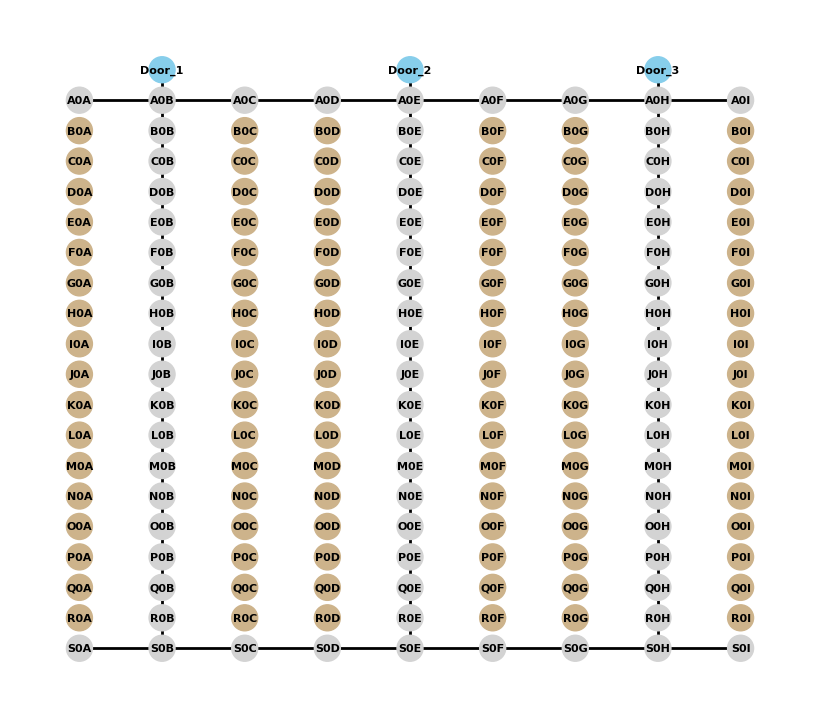

In [ ]:
G_OG = nx.Graph()

#จำนวน rows และ cols ทั้งหมดใน wh
rows = new_rows + 2
cols = 9

# Create a dictionary to store node positions
node_positions = {}
#สร้างโหนดที่มีชื่อ และตำแหน่ง เช่น A0A(0, 0), A0B(1, 0), A0C(2, 0), ..., A0I(8, 0), B0A(0, -1), B0B(1, -1), ...
for i in range(1, rows + 1):
  for j in range(1, cols + 1):
    node_name = f"{chr(64 + i):02}{chr(64 + j)}"
    G_OG.add_node(node_name)
    node_positions[node_name] = (j - 1, -(i - 1))

#กำหนด Door ของตำแหน่ง (1, 1), (4, 1), (7, 1)
door_positions = [(1, 1), (4, 1), (7, 1)]
door_names = ["Door_1", "Door_2", "Door_3"]
for door_position, door_name in zip(door_positions, door_names):
    G_OG.add_node(door_name, pos=door_position)
    node_positions[door_name] = door_position

#กำหนด char_value เช่น rows=1 คือ A, rows=2 คือ B, ..., rows=19 คือ S, ...
char_values = []
start_value = 1
end_value = rows
#สร้างลูป
for i in range(start_value, end_value + 1):
    quotient, remainder = divmod(i - 1, 26)
    char_value = ""
    if quotient > 0:
        char_value += chr(ord('a') + quotient - 1)
    char_value += chr(ord('a') + remainder)
    char_value = char_value.upper()
    char_values.append(char_value)
print(f"This warehouse have {i} rows and char_value is {char_value}")

#สร้างเส้นทางการเดินใน wh และกำหนด weight (แนวตั้ง)
edges = []
for i in range(1, rows):
    node_name_1 = f"{chr(64 + i):02}B"
    node_name_2 = f"{chr(64 + i + 1):02}B"
    G_OG.add_edge(node_name_1, node_name_2, weight=100)
    edges.append((node_name_1, node_name_2, 100))

    node_name_3 = f"{chr(64 + i):02}E"
    node_name_4 = f"{chr(64 + i + 1):02}E"
    G_OG.add_edge(node_name_3, node_name_4, weight=100)
    edges.append((node_name_3, node_name_4, 100))

    node_name_5 = f"{chr(64 + i):02}H"
    node_name_6 = f"{chr(64 + i + 1):02}H"
    G_OG.add_edge(node_name_5, node_name_6, weight=100)
    edges.append((node_name_5, node_name_6, 100))
#สร้างเส้นทางการเดินใน wh และกำหนด weight (แนวนอน)
additional_edges = [
    ("Door_1", "A0B", 0),("Door_2", "A0E", 0), ("Door_3", "A0H", 0),
    ("A0A", "A0B", 120),("A0B", "A0C", 120),("A0C", "A0D", 120),("A0D", "A0E", 120),("A0E", "A0F", 120),("A0F", "A0G", 120),("A0G", "A0H", 120),("A0H", "A0I", 120),
    (f"{char_value}0A",f"{char_value}0B", 120),(f"{char_value}0B", f"{char_value}0C", 120),(f"{char_value}0C", f"{char_value}0D", 120),(f"{char_value}0D", f"{char_value}0E", 120),
    (f"{char_value}0E", f"{char_value}0F", 120),(f"{char_value}0F", f"{char_value}0G", 120),(f"{char_value}0G", f"{char_value}0H", 120),(f"{char_value}0H", f"{char_value}0I", 120),
]
for edge in additional_edges:
    G_OG.add_edge(edge[0], edge[1], weight=edge[2])
    edges.append(edge)
#warehouse มีจำนวนเส้นทางการเดินทั้งหมด (เส้นทาง)
#print(len(edges))
print(f"Walking route for each node in warehouse:")
print(edges)

#กำหนด colors ให้แต่ละ node:
node_colors = []
for node in G_OG.nodes():
    if node.startswith('Door'):
        node_colors.append('skyblue')
    elif node in ['A0A', 'A0B', 'A0C', 'A0D', 'A0E', 'A0F', 'A0G', 'A0H', 'A0I']:
        node_colors.append('lightgray')
    elif node.endswith('0B') or node.endswith('0E') or node.endswith('0H'):
        node_colors.append('lightgray')
    elif node in [f"{char_value}0A", f"{char_value}0B", f"{char_value}0C", f"{char_value}0D", f"{char_value}0E", f"{char_value}0F", f"{char_value}0G", f"{char_value}0H", f"{char_value}0I"]:
        node_colors.append('lightgray')
    else:
        node_colors.append('#CDB38B')

# Show the warehouse map with different node colors
plt.figure(figsize=(8, 7))
pos = node_positions
nx.draw(G_OG, pos, with_labels=True, font_weight='bold', node_color=node_colors, node_size=350, font_size=8, font_color='black',
        font_family='sans-serif', edge_color='Black', width=2, edge_cmap=plt.cm.Blues)

#plt.savefig('/content/drive/MyDrive/is/graph/network_graph_OG.png')
#plt.savefig('/content/graph/network_graph_OG.png')
# Show the graph
#plt.show()

# **Mapping products with aisles to specify location**

In [ ]:
mapping = {
    'B0A': 'B0B', 'B0C': 'B0B', 'C0A': 'C0B', 'C0C': 'C0B', 'D0A': 'D0B', 'D0C': 'D0B', 'E0A': 'D0B', 'E0C': 'E0B', 'F0A': 'F0B', 'F0C': 'F0B',
    'G0A': 'G0B', 'G0C': 'G0B', 'H0A': 'H0B', 'H0C': 'H0B', 'I0A': 'I0B', 'I0C': 'I0B', 'J0A': 'J0B', 'J0C': 'J0B', 'K0A': 'K0B', 'K0C': 'K0B',
    'L0A': 'L0B', 'L0C': 'L0B', 'M0A': 'M0B', 'M0C': 'M0B', 'N0A': 'N0B', 'N0C': 'N0B', 'O0A': 'O0B', 'O0C': 'O0B', 'P0A': 'P0B', 'P0C': 'P0B',
    'Q0A': 'Q0B', 'Q0C': 'Q0B', 'R0A': 'R0B', 'R0C': 'R0B',

    'B0D': 'B0E', 'B0F': 'B0E', 'C0D': 'C0E', 'C0F': 'C0E', 'D0D': 'D0E', 'D0F': 'D0E', 'E0D': 'E0E', 'E0F': 'E0E', 'F0D': 'F0E', 'F0F': 'F0E',
    'G0D': 'G0E', 'G0F': 'G0E', 'H0D': 'H0E', 'H0F': 'H0E', 'I0D': 'I0E', 'I0F': 'I0E', 'J0D': 'J0E', 'J0F': 'J0E', 'K0D': 'K0E', 'K0F': 'K0E',
    'L0D': 'L0E', 'L0F': 'L0E', 'M0D': 'M0E', 'M0F': 'M0E', 'N0D': 'N0E', 'N0F': 'N0E', 'O0D': 'O0E', 'O0F': 'O0E', 'P0D': 'P0E', 'P0F': 'P0E',
    'Q0D': 'Q0E', 'Q0F': 'Q0E', 'R0D': 'R0E', 'R0F': 'R0E',

    'B0G': 'B0H', 'B0I': 'B0H', 'C0G': 'C0H', 'C0I': 'C0H', 'D0G': 'D0H', 'D0I': 'D0H', 'E0G': 'E0H', 'E0I': 'E0H', 'F0G': 'F0H', 'F0I': 'F0H',
    'G0G': 'G0H', 'G0I': 'G0H', 'H0G': 'H0H', 'H0I': 'H0H', 'I0G': 'I0H', 'I0I': 'I0H', 'J0G': 'J0H', 'J0I': 'J0H', 'K0G': 'K0H', 'K0I': 'K0H',
    'L0G': 'L0H', 'L0I': 'L0H', 'M0G': 'M0H', 'M0I': 'M0H', 'N0G': 'N0H', 'N0I': 'N0H', 'O0G': 'O0H', 'O0I': 'O0H', 'P0G': 'P0H', 'P0I': 'P0H',
    'Q0G': 'Q0H', 'Q0I': 'Q0H', 'R0G': 'R0H', 'R0I': 'R0H'
    }

# **Distance wh1** 📈📈📈📈


### **Process wh1** 💻

In [ ]:
#คัดลอกลิสต์ใหม่เพื่อป้องกันการอ้างอิง
all_selected_items_class_wh1 = copy.deepcopy(all_selected_items_class)

#สร้าง dict ที่มีการแปลงค่าตามเงื่อนไข
#ของ class a
value_mapping_class_a_wh1 = {}
for i in numbers_list_class_a:
    category = "D" if i % 2 == 1 else "F"
    value_mapping_class_a_wh1[i] = f"{chr(65 + (i + 1) // 2)}0{category}"
#print(f"value_mapping_class_a_wh1 = {value_mapping_class_a_wh1}")

#ของ class b
value_mapping_class_b_wh1 = {}
for i in numbers_list_class_b:
    if 11 <= i <= 20:
        category = "D" if i % 2 == 1 else "F"
        value_mapping_class_b_wh1[i] = f"{chr(65 + (i + 1) // 2)}0{category}"
    if 21 <= i <= 30:
        category = "A" if i % 2 == 1 else "C"
        value_mapping_class_b_wh1[i] = f"{chr(65 + (i - 19) // 2)}0{category}"
    if 31 <= i <= 40:
        category = "G" if i % 2 == 1 else "I"
        value_mapping_class_b_wh1[i] = f"{chr(65 + (i - 29) // 2)}0{category}"
#print(f"value_mapping_class_b_wh1 = {value_mapping_class_b_wh1}")

#ของ class c
value_mapping_class_c_wh1 = {}
for i in list(numbers_list_class_c):
    if 41 <= i <= 54:
        category = "D" if i % 2 == 1 else "F"
        value_mapping_class_c_wh1[i] = f"{chr(65 + (i - 19) // 2)}0{category}"
    if 55 <= i <= 76:
        category = "A" if i % 2 == 1 else "C"
        value_mapping_class_c_wh1[i] = f"{chr(65 + (i - 43) // 2)}0{category}"
    if 77 <= i <= 98:
        category = "G" if i % 2 == 1 else "I"
        value_mapping_class_c_wh1[i] = f"{chr(65 + (i - 65) // 2)}0{category}"
    if i == 99:
        value_mapping_class_c_wh1[i] = f'R0G'
    if i == 100:
        value_mapping_class_c_wh1[i] = f'R0C'
#print(f"value_mapping_class_c_wh1 = {value_mapping_class_c_wh1}")
#print("-----------**-----------")

# เปลี่ยนค่าในลิสต์ all_selected_items_class_i_wh1 ให้เป็นค่าต่าง ๆ ใน wh เช่น 1='B0D', 12='G0F', 44='D0C', ...
for sublist in all_selected_items_class_wh1:
    sublist[:] = [value_mapping_class_a_wh1.get(val, val) for val in sublist]
for sublist in all_selected_items_class_wh1:
    sublist[:] = [value_mapping_class_b_wh1.get(val, val) for val in sublist]
for sublist in all_selected_items_class_wh1:
    sublist[:] = [value_mapping_class_c_wh1.get(val, val) for val in sublist]

# พิมพ์ค่าทั้งหมด
print(f"Selected Items Class: {all_selected_items_class}")
print(f"Selected Items Class: {all_selected_items_class_wh1}")

Selected Items Class: [[3, 5, 2, 6], [4, 3, 6, 24], [2, 9, 48, 2], [6, 24, 2, 9], [53, 3, 9, 3], [10, 5, 3, 6], [10, 4, 3, 31], [8, 6, 5, 19], [8, 3, 1, 46], [6, 10, 5, 1], [36, 10, 6, 8], [1, 3, 8, 1], [7, 4, 1, 2], [2, 7, 8, 39], [5, 2, 1, 5], [5, 9, 8, 5], [18, 8, 22, 9], [8, 5, 5, 5], [3, 2, 2, 2], [5, 5, 5, 3], [6, 1, 3, 5], [4, 5, 8, 10], [8, 5, 3, 2], [2, 26, 9, 35], [4, 5, 39, 4], [3, 3, 6, 2], [6, 8, 6, 5], [10, 68, 7, 6], [9, 8, 10, 24], [8, 38, 10, 1], [8, 4, 7, 2], [18, 5, 9, 2], [8, 35, 10, 2], [1, 5, 8, 32], [3, 39, 10, 47], [9, 2, 10, 4], [7, 10, 75, 2], [2, 10, 3, 5], [2, 55, 10, 5], [5, 31, 5, 10], [31, 5, 2, 5], [7, 5, 9, 7], [2, 6, 80, 3], [70, 6, 6, 43], [5, 1, 3, 3], [69, 3, 8, 17], [5, 25, 3, 4], [8, 3, 1, 5], [54, 7, 6, 56], [2, 7, 9, 8], [26, 2, 6, 5], [3, 5, 5, 35], [10, 2, 10, 5], [10, 5, 59, 7], [9, 40, 54, 6], [6, 8, 2, 2], [8, 18, 4, 8], [5, 35, 20, 6], [2, 1, 5, 49], [49, 3, 8, 8], [5, 5, 7, 32], [1, 5, 2, 2], [3, 7, 2, 36], [8, 3, 5, 6], [3, 1, 6, 8], [1,

In [ ]:
# ตัวแปรที่ใช้เก็บผลลัพธ์
results_wh1_new_map = []

# เงื่อนไขการเลือก doors
chosen_doors_wh1_list = []
for choose_door_wh1 in range(1, 4):
    # สร้างตัวแปร chosen_doors_wh1 และเก็บค่าตามเงื่อนไข
    if choose_door_wh1 == 1:
        chosen_doors_wh1 = ['A0B']
    elif choose_door_wh1 == 2:
        chosen_doors_wh1 = ['A0E']
    elif choose_door_wh1 == 3:
        chosen_doors_wh1 = ['A0H']
    else:
        raise ValueError(f"Invalid value for choose_door: {choose_door_wh1}")

    # เก็บ chosen_doors_wh1 ใน list
    chosen_doors_wh1_list.append(chosen_doors_wh1)

    # นำ list มาต่อกัน
    result_wh1 = []
    for item_wh1 in all_selected_items_class_wh1:
        result_wh1.append(chosen_doors_wh1 + item_wh1+ chosen_doors_wh1)

    # ปรับปรุง result_wh1 โดยใช้ mapping
    result_map_wh1 = [[mapping[val] if val in mapping else val for val in sublist] for sublist in result_wh1]

    results_wh1_new_map.append(result_map_wh1)

    # แสดงผลลัพธ์
    print(f'Chosen Doors {choose_door_wh1}')
    print(result_wh1)
print()
#results_wh1_new_map

Chosen Doors 1
[['A0B', 'C0D', 'D0D', 'B0F', 'D0F', 'A0B'], ['A0B', 'C0F', 'C0D', 'D0F', 'C0C', 'A0B'], ['A0B', 'B0F', 'F0D', 'O0F', 'B0F', 'A0B'], ['A0B', 'D0F', 'C0C', 'B0F', 'F0D', 'A0B'], ['A0B', 'R0D', 'C0D', 'F0D', 'C0D', 'A0B'], ['A0B', 'F0F', 'D0D', 'C0D', 'D0F', 'A0B'], ['A0B', 'F0F', 'C0F', 'C0D', 'B0G', 'A0B'], ['A0B', 'E0F', 'D0F', 'D0D', 'K0D', 'A0B'], ['A0B', 'E0F', 'C0D', 'B0D', 'N0F', 'A0B'], ['A0B', 'D0F', 'F0F', 'D0D', 'B0D', 'A0B'], ['A0B', 'D0I', 'F0F', 'D0F', 'E0F', 'A0B'], ['A0B', 'B0D', 'C0D', 'E0F', 'B0D', 'A0B'], ['A0B', 'E0D', 'C0F', 'B0D', 'B0F', 'A0B'], ['A0B', 'B0F', 'E0D', 'E0F', 'F0G', 'A0B'], ['A0B', 'D0D', 'B0F', 'B0D', 'D0D', 'A0B'], ['A0B', 'D0D', 'F0D', 'E0F', 'D0D', 'A0B'], ['A0B', 'J0F', 'E0F', 'B0C', 'F0D', 'A0B'], ['A0B', 'E0F', 'D0D', 'D0D', 'D0D', 'A0B'], ['A0B', 'C0D', 'B0F', 'B0F', 'B0F', 'A0B'], ['A0B', 'D0D', 'D0D', 'D0D', 'C0D', 'A0B'], ['A0B', 'D0F', 'B0D', 'C0D', 'D0D', 'A0B'], ['A0B', 'C0F', 'D0D', 'E0F', 'F0F', 'A0B'], ['A0B', 'E0F', '

## **Plt wh1** 📦

In [ ]:
G_wh1 = G_OG

[('A0B', 'B0B', 100), ('A0E', 'B0E', 100), ('A0H', 'B0H', 100), ('B0B', 'C0B', 100), ('B0E', 'C0E', 100), ('B0H', 'C0H', 100), ('C0B', 'D0B', 100), ('C0E', 'D0E', 100), ('C0H', 'D0H', 100), ('D0B', 'E0B', 100), ('D0E', 'E0E', 100), ('D0H', 'E0H', 100), ('E0B', 'F0B', 100), ('E0E', 'F0E', 100), ('E0H', 'F0H', 100), ('F0B', 'G0B', 100), ('F0E', 'G0E', 100), ('F0H', 'G0H', 100), ('G0B', 'H0B', 100), ('G0E', 'H0E', 100), ('G0H', 'H0H', 100), ('H0B', 'I0B', 100), ('H0E', 'I0E', 100), ('H0H', 'I0H', 100), ('I0B', 'J0B', 100), ('I0E', 'J0E', 100), ('I0H', 'J0H', 100), ('J0B', 'K0B', 100), ('J0E', 'K0E', 100), ('J0H', 'K0H', 100), ('K0B', 'L0B', 100), ('K0E', 'L0E', 100), ('K0H', 'L0H', 100), ('L0B', 'M0B', 100), ('L0E', 'M0E', 100), ('L0H', 'M0H', 100), ('M0B', 'N0B', 100), ('M0E', 'N0E', 100), ('M0H', 'N0H', 100), ('N0B', 'O0B', 100), ('N0E', 'O0E', 100), ('N0H', 'O0H', 100), ('O0B', 'P0B', 100), ('O0E', 'P0E', 100), ('O0H', 'P0H', 100), ('P0B', 'Q0B', 100), ('P0E', 'Q0E', 100), ('P0H', 'Q0H

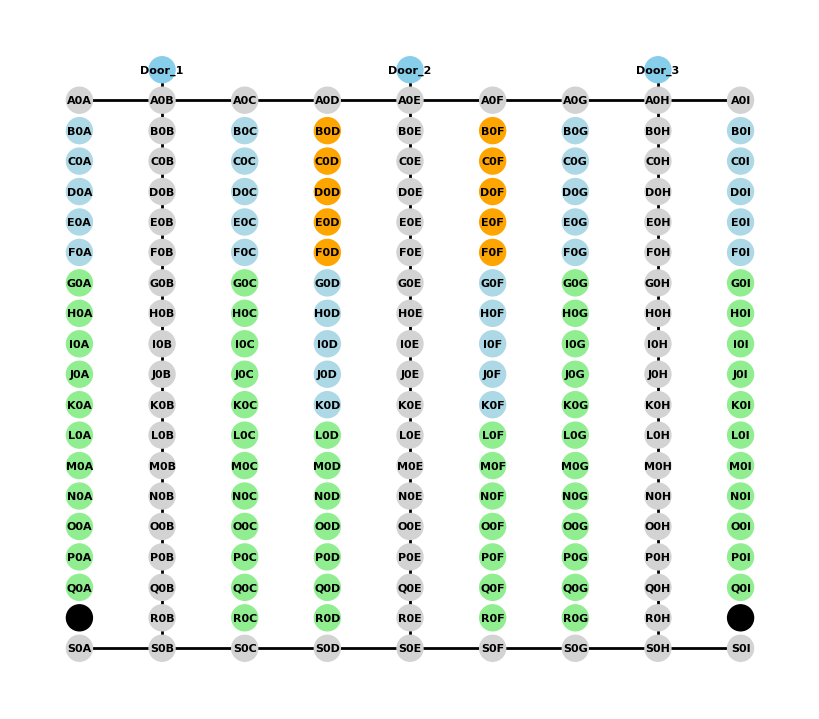

In [ ]:
G_wh1

# Example usage:
node_colors = []
for node in G_wh1.nodes():
    if node.startswith('Door'):
        node_colors.append('skyblue')
    elif node in ['A0A', 'A0B', 'A0C', 'A0D', 'A0E', 'A0F', 'A0G', 'A0H', 'A0I']:
        node_colors.append('lightgray')
    #cols 1
    elif any(node.startswith(f"{CA}0A") for CA in 'GHIJKLMNOPQ'):
        node_colors.append('lightgreen')
    elif any(node.startswith(f"{BA}0A") for BA in 'BCDEF'):
        node_colors.append('lightblue')
    #cols 2(ทางเดิน)
    elif node in [f"{char_value}0B" for char_value in 'BCDEFGHIJKLMNOPQRSTUVWXYZ']:
        node_colors.append('lightgray')
    #cols 3
    elif any(node.startswith(f"{CC}0C") for CC in 'GHIJKLMNOPQR'):
        node_colors.append('lightgreen')
    elif any(node.startswith(f"{BC}0C") for BC in 'BCDEF'):
        node_colors.append('lightblue')
    #cols 4
    elif any(node.startswith(f"{AD}0D") for AD in 'BCDEF'):
        node_colors.append('orange')
    elif any(node.startswith(f"{BD}0D") for BD in 'GHIJK'):
        node_colors.append('lightblue')
    elif any(node.startswith(f"{CD}0D") for CD in 'LMNOPQR'):
        node_colors.append('lightgreen')
    #cols 5(ทางเดิน)
    elif node in [f"{char_value}0E" for char_value in 'BCDEFGHIJKLMNOPQRSTUVWXYZ']:
        node_colors.append('lightgray')
    #cols 6
    elif any(node.startswith(f"{AF}0F") for AF in 'BCDEF'):
        node_colors.append('orange')
    elif any(node.startswith(f"{BF}0F") for BF in 'GHIJK'):
        node_colors.append('lightblue')
    elif any(node.startswith(f"{CF}0F") for CF in 'LMNOPQR'):
        node_colors.append('lightgreen')
    #cols 7
    elif any(node.startswith(f"{CG}0G") for CG in 'GHIJKLMNOPQR'):
        node_colors.append('lightgreen')
    elif any(node.startswith(f"{BG}0G") for BG in 'BCDEF'):
        node_colors.append('lightblue')
    #cols 8(ทางเดิน)
    elif node in [f"{char_value}0H" for char_value in 'BCDEFGHIJKLMNOPQRSTUVWXYZ']:
        node_colors.append('lightgray')
    #cols 9
    elif any(node.startswith(f"{CI}0I") for CI in 'GHIJKLMNOPQ'):
        node_colors.append('lightgreen')
    elif any(node.startswith(f"{BI}0I") for BI in 'BCDEF'):
        node_colors.append('lightblue')
    #แถวสุดท้าย
    elif node in [f"{char_value}0A", f"{char_value}0B", f"{char_value}0C", f"{char_value}0D", f"{char_value}0E", f"{char_value}0F", f"{char_value}0G", f"{char_value}0H", f"{char_value}0I"]:
        node_colors.append('lightgray')
    else:
        node_colors.append('black')

edges_wh1 = edges
print(edges_wh1)

plt.figure(figsize=(8, 7))
pos = node_positions
nx.draw(G_wh1, pos, with_labels=True, font_weight='bold', node_color=node_colors, node_size=350, font_size=8, font_color='black',
        font_family='sans-serif', edge_color='Black', width=2, edge_cmap=plt.cm.Blues)

#save_fig_wh11 = '/content/drive/MyDrive/is/graph/network_graph_wh1.png'
#save_fig_wh12 = '/content/graph/network_graph_wh1.png'
#plt.savefig(save_fig_wh11)
#plt.savefig(save_fig_wh12)

# Show the graph
#plt.show()

## **Dis wh1** 📊

In [ ]:
new_wh1 = []
for inner_list in results_wh1_new_map:
  for j in range(num_iterations):
    new_wh1.append(inner_list[j])
#new_wh1

In [ ]:
nested_list_wh1 = new_wh1
dis_wh1 = []
for i in range(len(nested_list_wh1)):
    for j in range(1, len(nested_list_wh1[i])):  # แก้ loop range จาก 0 เป็น 1
        start_node = nested_list_wh1[i][j-1]
        end_node = nested_list_wh1[i][j]
        # Assuming G_wh1 is defined somewhere in your code
        shortest_path = nx.shortest_path(G_wh1, source=start_node, target=end_node, weight='weight')
        # Find the weight of the shortest path
        shortest_path_weight = nx.shortest_path_length(G_wh1, source=start_node, target=end_node, weight='weight')
        dis_wh1.append(shortest_path_weight)
print(dis_wh1)

# สร้างลิสต์สำหรับเก็บผลลัพธ์
result_list_wh1 = []
# ใช้ลูป for เพื่อนำค่าบวกกันในแต่ละกลุ่ม
for i in range(0, len(dis_wh1), num_items_to_pick+1):
    group = dis_wh1[i:i+num_items_to_pick+1]
    group_sum = sum(group)
    result_list_wh1.append(group_sum)
print(result_list_wh1)

[560, 100, 200, 200, 660, 560, 0, 100, 860, 200, 460, 400, 900, 1300, 460, 660, 860, 660, 400, 860, 2060, 1500, 300, 300, 560, 860, 200, 100, 100, 660, 860, 300, 0, 660, 820, 760, 100, 0, 700, 1360, 760, 200, 100, 1200, 1660, 660, 200, 200, 200, 460, 1020, 1160, 200, 100, 760, 460, 100, 200, 300, 460, 760, 200, 100, 0, 460, 460, 300, 0, 1260, 1220, 660, 200, 0, 200, 660, 660, 200, 100, 100, 660, 1260, 500, 860, 960, 860, 760, 100, 0, 0, 660, 560, 100, 0, 0, 460, 660, 0, 0, 100, 560, 660, 200, 100, 100, 660, 560, 100, 100, 100, 860, 760, 100, 100, 100, 460, 460, 760, 1160, 1160, 1020, 560, 100, 1160, 1060, 560, 560, 0, 100, 200, 460, 660, 100, 100, 0, 660, 860, 2060, 1960, 100, 660, 860, 100, 100, 1060, 200, 760, 1160, 1260, 400, 460, 760, 200, 200, 300, 460, 1260, 600, 200, 400, 460, 760, 1060, 1160, 400, 460, 460, 200, 100, 860, 820, 560, 1060, 1360, 900, 1760, 860, 400, 400, 300, 560, 760, 100, 1860, 2060, 460, 460, 400, 300, 100, 660, 460, 1060, 1460, 200, 660, 660, 760, 760, 200, 8

In [ ]:
new_wh1
result_list_wh1
average_distance_wh1_all = []
for choose_door_wh1 in range(1, 4):
    #print(f"ประตูที่ {choose_door_wh1}")

    total_distance_wh1 = 0  # ต้องรีเซ็ตค่า total_distance_wh1 ทุกรอบ
    for i in range(1, num_iterations + 1):
        path = new_wh1[(choose_door_wh1 - 1) * num_iterations + i - 1]
        distance_wh1 = result_list_wh1[(choose_door_wh1 - 1) * num_iterations + i - 1]

        total_distance_wh1 += distance_wh1
        average_distance_wh1 = total_distance_wh1 / i if i != 0 else 0
        average_distance_wh1_all.append(float(average_distance_wh1))

        #print(f"รอบการสุ่มที่ {i} ทางเดินที่: {path} ได้ระยะทางที่สั้นที่สุดคือ {distance_wh1}")
    #print(f">> ระยะทางเฉลี่ย: {average_distance_wh1}")

## **Result wh1** 🍻

In [ ]:
# ใช้ numpy.array_split เพื่อแบ่งลิสต์เป็นกลุ่มที่เท่ากัน
groups_wh1 = np.array_split(result_list_wh1, 3)

# กำหนดค่าในตัวแปร y1, y2, y3 นอกลูป
w1, w2, w3 = groups_wh1

# พิมพ์ผลลัพธ์ในลูป for
dd = []
for i, group in enumerate(groups_wh1, start=1):
    dd.append(group)
    #print(f"y{i} =", group)

avg_dis_st_wh1_d1 = np.mean(w1)
avg_dis_st_wh1_d2 = np.mean(w2)
avg_dis_st_wh1_d3 = np.mean(w3)

# สร้างตัวแปร
avg_dis_st_wh1_d1_ = avg_dis_st_wh1_d1
avg_dis_st_wh1_d2_ = avg_dis_st_wh1_d2
avg_dis_st_wh1_d3_ = avg_dis_st_wh1_d3

# เขียนค่าลงในไฟล์ .txt
file_path_drive = os.path.join('/content/drive/MyDrive/is/result_avg_dis/each_dis/', f'{n_r}_result_avg_dis_wh1.txt')
with open(file_path_drive, 'w') as file:
    file.write('\n'.join(map(str, [avg_dis_st_wh1_d1_, avg_dis_st_wh1_d2_, avg_dis_st_wh1_d3_])))

#file_path_local = os.path.join('/content/result_avg_dis/', f'{n_r}_result_avg_dis_wh1.txt')
#with open(file_path_local, 'w') as file:
#    file.write('\n'.join(map(str, [avg_dis_st_wh1_d1_, avg_dis_st_wh1_d2_, avg_dis_st_wh1_d3_])))

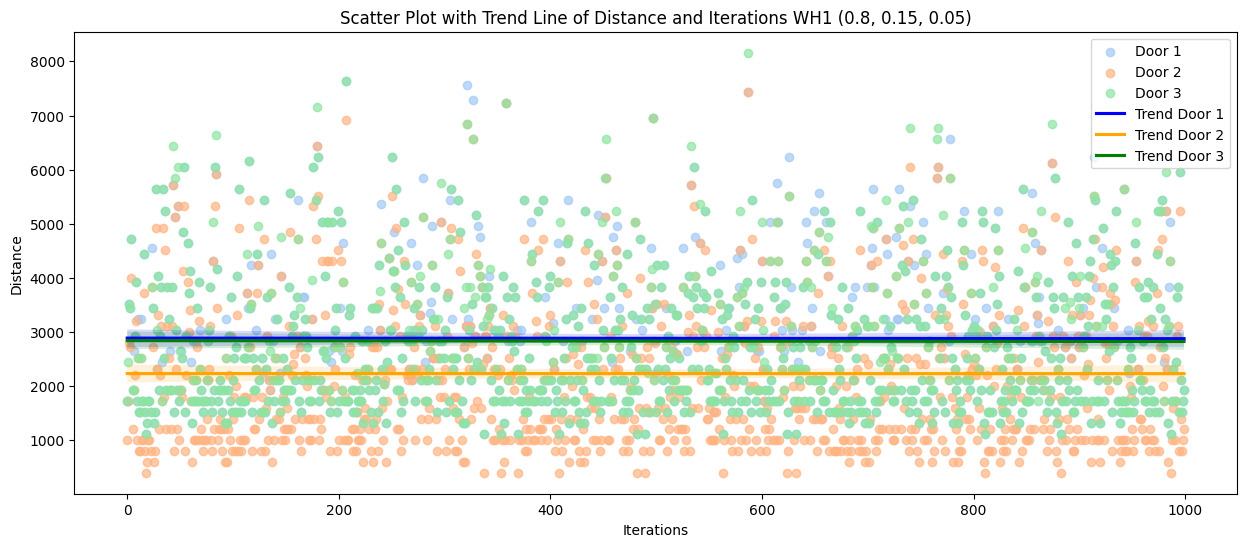

In [ ]:
# ตั้งค่าสีโดยใช้ pastel palette
sns.set_palette("pastel")

# สร้างภาพด้วย figsize
plt.figure(figsize=(15, 6))

# พล็อต scatter plot
plt.scatter(range(len(w1)), w1, label='Door 1', alpha=0.7)
plt.scatter(range(len(w2)), w2, label='Door 2', alpha=0.7)
plt.scatter(range(len(w3)), w3, label='Door 3', alpha=0.7)

# เพิ่ม trend line
sns.regplot(x=list(range(len(w1))), y=w1, scatter=False, label='Trend Door 1', color='blue')
sns.regplot(x=list(range(len(w2))), y=w2, scatter=False, label='Trend Door 2', color='orange')
sns.regplot(x=list(range(len(w3))), y=w3, scatter=False, label='Trend Door 3', color='green')

# ปรับแต่งรายละเอียด
plt.title('Scatter Plot with Trend Line of Distance and Iterations WH1 ' f'({prob_a}, {prob_b}, {prob_c})')
plt.xlabel('Iterations')
plt.ylabel('Distance')
plt.legend()

#s1_wh1 = os.path.join('/content/drive/MyDrive/is/result_pic/plot/', f'{n_r}_graph_wh1_plot.png')
#s2_wh1 = os.path.join('/content/result_pic/plot/', f'{n_r}_graph_wh1_plot.png')
#plt.savefig(s1_wh1)
#plt.savefig(s2_wh1)

# แสดงกราฟ
#plt.show()

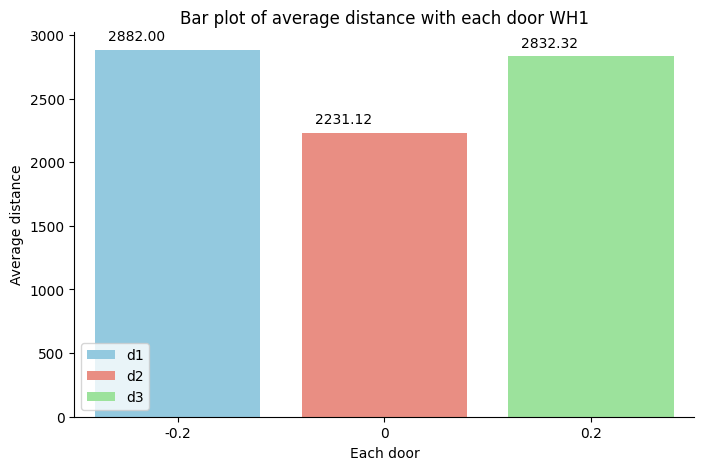

In [ ]:
# พล็อตกราฟแท่งที่ซ้อนกันด้วย Seaborn
bar_width = 0.2
index = np.arange(1)

sns.set_palette("pastel")  # กำหนดสีให้กับแผนภูมิ

plt.figure(figsize=(8, 5))  # กำหนดขนาดของกราฟ
ax = sns.barplot(x=index - bar_width, y=[avg_dis_st_wh1_d1], color="skyblue", label='d1')
sns.barplot(x=index, y=[avg_dis_st_wh1_d2], color="salmon", label='d2')
sns.barplot(x=index + bar_width, y=[avg_dis_st_wh1_d3], color="lightgreen", label='d3')

# เพิ่มตัวเลข z ลงบนแผนภูมิ
for i, value in enumerate([avg_dis_st_wh1_d1, avg_dis_st_wh1_d2, avg_dis_st_wh1_d3]):
    ax.text(i - bar_width, value + 50, f"{value:.2f}", ha='center', va='bottom', color='black', fontsize=10)

# ปรับแต่งรายละเอียด
plt.title('Bar plot of average distance with each door WH1')
plt.xlabel('Each door')
plt.ylabel('Average distance')

# ปิดเส้นพื้นหลังด้านบนและด้านข้าง
sns.despine(top=True, right=True, left=False, bottom=False)

# ปรับตำแหน่งของ legend มาที่มุมล่างซ้าย
plt.legend(loc='lower left', bbox_to_anchor=(0, 0))

#s3_wh1 = os.path.join('/content/drive/MyDrive/is/result_pic/avg/', f'{n_r}_graph_wh1_avg.png')
#s4_wh1 = os.path.join('/content/result_pic/avg/', f'{n_r}_graph_wh1_avg.png')
#plt.savefig(s3_wh1)
#plt.savefig(s4_wh1)

#plt.show()

# **Distance wh2** 📈📈📈📈

### **Process wh2** 💻

In [ ]:
#คัดลอกลิสต์ใหม่เพื่อป้องกันการอ้างอิง
all_selected_items_class_wh2 = copy.deepcopy(all_selected_items_class)

#สร้าง dict ที่มีการแปลงค่าตามเงื่อนไข
#ของ class a
value_mapping_class_a_wh2 = {}
for i in numbers_list_class_a:
    category = "D" if i % 2 == 1 else "F"
    value_mapping_class_a_wh2[i] = f"{chr(65 + (i + 1) // 2)}0{category}"
#print(f"value_mapping_class_a_wh2 = {value_mapping_class_a_wh2}")

#ของ class b
value_mapping_class_b_wh2 = {}
for i in numbers_list_class_b:
    if 11 <= i <= 40:
        category = "D" if i % 2 == 1 else "F"
        value_mapping_class_b_wh2[i] = f"{chr(65 + (i + 1) // 2)}0{category}"
    if i == 35:
        value_mapping_class_b_wh2[i] = f'R0A'
    if i == 36:
        value_mapping_class_b_wh2[i] = f'Q0C'
    if i == 37:
        value_mapping_class_b_wh2[i] = f'Q0G'
    if i == 38:
        value_mapping_class_b_wh2[i] = f'R0C'
    if i == 39:
        value_mapping_class_b_wh2[i] = f'R0G'
    if i == 40:
        value_mapping_class_b_wh2[i] = f'R0I'
#print(f"value_mapping_class_b_wh2 = {value_mapping_class_b_wh2}")

#ของ class c
value_mapping_class_c_wh2 = {}
for i in list(numbers_list_class_c):
    if 1 <= i <= 69:
        category = "A" if i % 2 == 1 else "C"
        value_mapping_class_c_wh2[i] = f"{chr(65 + (i - 37) // 2)}0{category}"
    if i == 70:
        value_mapping_class_c_wh2[i] = f'B0C'
    if 71 <= i <= 98:
        category = "G" if i % 2 == 1 else "I"
        value_mapping_class_c_wh2[i] = f"{chr(65 + (i - 67) // 2)}0{category}"
    if i == 99:
        value_mapping_class_c_wh2[i] = f'B0G'
    if i == 100:
        value_mapping_class_c_wh2[i] = f'Q0I'
#print(f"value_mapping_class_c_wh2 = {value_mapping_class_c_wh2}")
#print("-----------**-----------")

# เปลี่ยนค่าในลิสต์ all_selected_items_class_i_wh1 ให้เป็นค่าต่าง ๆ ใน wh เช่น 1='B0D', 12='G0F', 44='D0C', ...
for sublist in all_selected_items_class_wh2:
    sublist[:] = [value_mapping_class_a_wh2.get(val, val) for val in sublist]
for sublist in all_selected_items_class_wh2:
    sublist[:] = [value_mapping_class_b_wh2.get(val, val) for val in sublist]
for sublist in all_selected_items_class_wh2:
    sublist[:] = [value_mapping_class_c_wh2.get(val, val) for val in sublist]

# พิมพ์ค่าทั้งหมด
print(f"Selected Items Class: {all_selected_items_class}")
print(f"Selected Items Class: {all_selected_items_class_wh2}")

Selected Items Class: [[3, 5, 2, 6], [4, 3, 6, 24], [2, 9, 48, 2], [6, 24, 2, 9], [53, 3, 9, 3], [10, 5, 3, 6], [10, 4, 3, 31], [8, 6, 5, 19], [8, 3, 1, 46], [6, 10, 5, 1], [36, 10, 6, 8], [1, 3, 8, 1], [7, 4, 1, 2], [2, 7, 8, 39], [5, 2, 1, 5], [5, 9, 8, 5], [18, 8, 22, 9], [8, 5, 5, 5], [3, 2, 2, 2], [5, 5, 5, 3], [6, 1, 3, 5], [4, 5, 8, 10], [8, 5, 3, 2], [2, 26, 9, 35], [4, 5, 39, 4], [3, 3, 6, 2], [6, 8, 6, 5], [10, 68, 7, 6], [9, 8, 10, 24], [8, 38, 10, 1], [8, 4, 7, 2], [18, 5, 9, 2], [8, 35, 10, 2], [1, 5, 8, 32], [3, 39, 10, 47], [9, 2, 10, 4], [7, 10, 75, 2], [2, 10, 3, 5], [2, 55, 10, 5], [5, 31, 5, 10], [31, 5, 2, 5], [7, 5, 9, 7], [2, 6, 80, 3], [70, 6, 6, 43], [5, 1, 3, 3], [69, 3, 8, 17], [5, 25, 3, 4], [8, 3, 1, 5], [54, 7, 6, 56], [2, 7, 9, 8], [26, 2, 6, 5], [3, 5, 5, 35], [10, 2, 10, 5], [10, 5, 59, 7], [9, 40, 54, 6], [6, 8, 2, 2], [8, 18, 4, 8], [5, 35, 20, 6], [2, 1, 5, 49], [49, 3, 8, 8], [5, 5, 7, 32], [1, 5, 2, 2], [3, 7, 2, 36], [8, 3, 5, 6], [3, 1, 6, 8], [1,

In [ ]:
# ตัวแปรที่ใช้เก็บผลลัพธ์
results_wh2_new_map = []

# เงื่อนไขการเลือก doors
chosen_doors_wh2_list = []
for choose_door_wh2 in range(1, 4):
    # สร้างตัวแปร chosen_doors_wh1 และเก็บค่าตามเงื่อนไข
    if choose_door_wh2 == 1:
        chosen_doors_wh2 = ['A0B']
    elif choose_door_wh2 == 2:
        chosen_doors_wh2 = ['A0E']
    elif choose_door_wh2 == 3:
        chosen_doors_wh2 = ['A0H']
    else:
        raise ValueError(f"Invalid value for choose_door: {choose_door_wh2}")

    # เก็บ chosen_doors_wh2 ใน list
    chosen_doors_wh2_list.append(chosen_doors_wh2)

    # นำ list มาต่อกัน
    result_wh2 = []
    for item_wh2 in all_selected_items_class_wh2:
        result_wh2.append(chosen_doors_wh2 + item_wh2 + chosen_doors_wh2)

    # ปรับปรุง result_wh1 โดยใช้ mapping
    result_map_wh2 = [[mapping[val] if val in mapping else val for val in sublist] for sublist in result_wh2]

    results_wh2_new_map.append(result_map_wh2)

    # แสดงผลลัพธ์
    print(f'Chosen Doors {choose_door_wh2}')
    print(result_wh1)
print()
#results_wh2_new_map

Chosen Doors 1
[['A0H', 'C0D', 'D0D', 'B0F', 'D0F', 'A0H'], ['A0H', 'C0F', 'C0D', 'D0F', 'C0C', 'A0H'], ['A0H', 'B0F', 'F0D', 'O0F', 'B0F', 'A0H'], ['A0H', 'D0F', 'C0C', 'B0F', 'F0D', 'A0H'], ['A0H', 'R0D', 'C0D', 'F0D', 'C0D', 'A0H'], ['A0H', 'F0F', 'D0D', 'C0D', 'D0F', 'A0H'], ['A0H', 'F0F', 'C0F', 'C0D', 'B0G', 'A0H'], ['A0H', 'E0F', 'D0F', 'D0D', 'K0D', 'A0H'], ['A0H', 'E0F', 'C0D', 'B0D', 'N0F', 'A0H'], ['A0H', 'D0F', 'F0F', 'D0D', 'B0D', 'A0H'], ['A0H', 'D0I', 'F0F', 'D0F', 'E0F', 'A0H'], ['A0H', 'B0D', 'C0D', 'E0F', 'B0D', 'A0H'], ['A0H', 'E0D', 'C0F', 'B0D', 'B0F', 'A0H'], ['A0H', 'B0F', 'E0D', 'E0F', 'F0G', 'A0H'], ['A0H', 'D0D', 'B0F', 'B0D', 'D0D', 'A0H'], ['A0H', 'D0D', 'F0D', 'E0F', 'D0D', 'A0H'], ['A0H', 'J0F', 'E0F', 'B0C', 'F0D', 'A0H'], ['A0H', 'E0F', 'D0D', 'D0D', 'D0D', 'A0H'], ['A0H', 'C0D', 'B0F', 'B0F', 'B0F', 'A0H'], ['A0H', 'D0D', 'D0D', 'D0D', 'C0D', 'A0H'], ['A0H', 'D0F', 'B0D', 'C0D', 'D0D', 'A0H'], ['A0H', 'C0F', 'D0D', 'E0F', 'F0F', 'A0H'], ['A0H', 'E0F', '

## **Plt wh2** 📦

In [ ]:
G_wh2 = G_OG

[('A0B', 'B0B', 100), ('A0E', 'B0E', 100), ('A0H', 'B0H', 100), ('B0B', 'C0B', 100), ('B0E', 'C0E', 100), ('B0H', 'C0H', 100), ('C0B', 'D0B', 100), ('C0E', 'D0E', 100), ('C0H', 'D0H', 100), ('D0B', 'E0B', 100), ('D0E', 'E0E', 100), ('D0H', 'E0H', 100), ('E0B', 'F0B', 100), ('E0E', 'F0E', 100), ('E0H', 'F0H', 100), ('F0B', 'G0B', 100), ('F0E', 'G0E', 100), ('F0H', 'G0H', 100), ('G0B', 'H0B', 100), ('G0E', 'H0E', 100), ('G0H', 'H0H', 100), ('H0B', 'I0B', 100), ('H0E', 'I0E', 100), ('H0H', 'I0H', 100), ('I0B', 'J0B', 100), ('I0E', 'J0E', 100), ('I0H', 'J0H', 100), ('J0B', 'K0B', 100), ('J0E', 'K0E', 100), ('J0H', 'K0H', 100), ('K0B', 'L0B', 100), ('K0E', 'L0E', 100), ('K0H', 'L0H', 100), ('L0B', 'M0B', 100), ('L0E', 'M0E', 100), ('L0H', 'M0H', 100), ('M0B', 'N0B', 100), ('M0E', 'N0E', 100), ('M0H', 'N0H', 100), ('N0B', 'O0B', 100), ('N0E', 'O0E', 100), ('N0H', 'O0H', 100), ('O0B', 'P0B', 100), ('O0E', 'P0E', 100), ('O0H', 'P0H', 100), ('P0B', 'Q0B', 100), ('P0E', 'Q0E', 100), ('P0H', 'Q0H

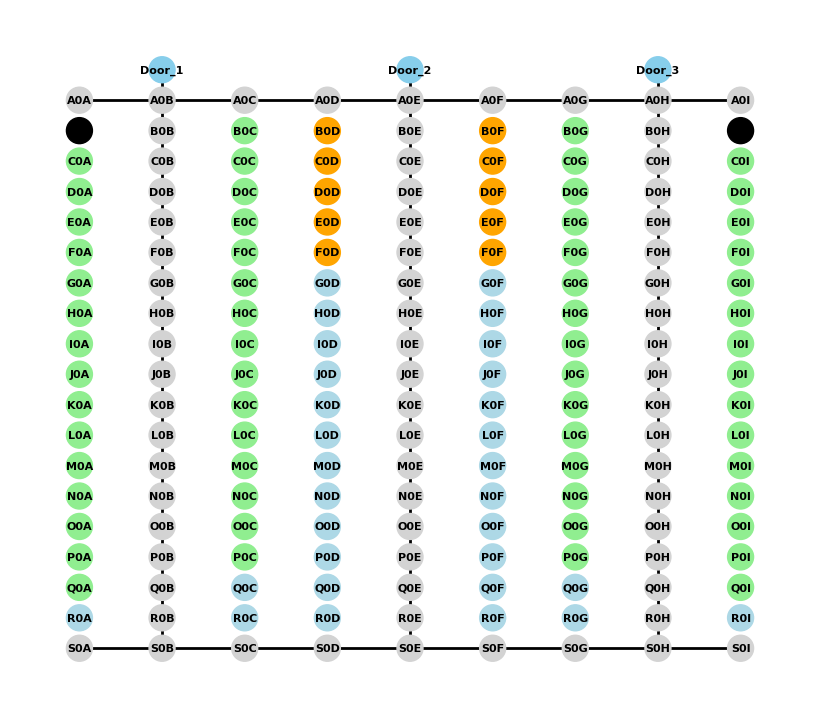

In [ ]:
G_wh2

# Example usage:
node_colors = []
for node in G_wh2.nodes():
    if node.startswith('Door'):
        node_colors.append('skyblue')
    elif node in ['A0A', 'A0B', 'A0C', 'A0D', 'A0E', 'A0F', 'A0G', 'A0H', 'A0I']:
        node_colors.append('lightgray')
    #cols 1
    elif any(node.startswith(f"{CA}0A") for CA in 'CDEFGHIJKLMNOPQ'):
        node_colors.append('lightgreen')
    elif any(node.startswith(f"{BA}0A") for BA in 'R'):
        node_colors.append('lightblue')
    #cols 2(ทางเดิน)
    elif node in [f"{char_value}0B" for char_value in 'BCDEFGHIJKLMNOPQRSTUVWXYZ']:
        node_colors.append('lightgray')
    #cols 3
    elif any(node.startswith(f"{CC}0C") for CC in 'BCDEFGHIJKLMNOP'):
        node_colors.append('lightgreen')
    elif any(node.startswith(f"{BC}0C") for BC in 'QR'):
        node_colors.append('lightblue')
    #cols 4
    elif any(node.startswith(f"{AD}0D") for AD in 'BCDEF'):
        node_colors.append('orange')
    elif any(node.startswith(f"{BD}0D") for BD in 'GHIJKLMNOPQR'):
        node_colors.append('lightblue')
    #cols 5(ทางเดิน)
    elif node in [f"{char_value}0E" for char_value in 'BCDEFGHIJKLMNOPQRSTUVWXYZ']:
        node_colors.append('lightgray')
    #cols 6
    elif any(node.startswith(f"{AF}0F") for AF in 'BCDEF'):
        node_colors.append('orange')
    elif any(node.startswith(f"{BF}0F") for BF in 'GHIJKLMNOPQR'):
        node_colors.append('lightblue')
    #cols 7
    elif any(node.startswith(f"{CG}0G") for CG in 'BCDEFGHIJKLMNOP'):
        node_colors.append('lightgreen')
    elif any(node.startswith(f"{BG}0G") for BG in 'QR'):
        node_colors.append('lightblue')
    #cols 8(ทางเดิน)
    elif node in [f"{char_value}0H" for char_value in 'BCDEFGHIJKLMNOPQRSTUVWXYZ']:
        node_colors.append('lightgray')
    #cols 9
    elif any(node.startswith(f"{CI}0I") for CI in 'CDEFGHIJKLMNOPQ'):
        node_colors.append('lightgreen')
    elif any(node.startswith(f"{BI}0I") for BI in 'R'):
        node_colors.append('lightblue')
    #แถวสุดท้าย
    elif node in [f"{char_value}0A", f"{char_value}0B", f"{char_value}0C", f"{char_value}0D", f"{char_value}0E", f"{char_value}0F", f"{char_value}0G", f"{char_value}0H", f"{char_value}0I"]:
        node_colors.append('lightgray')
    else:
        node_colors.append('black')

edges_wh2 = edges
print(edges_wh2)

plt.figure(figsize=(8, 7))
pos = node_positions
nx.draw(G_wh2, pos, with_labels=True, font_weight='bold', node_color=node_colors, node_size=350, font_size=8, font_color='black',
        font_family='sans-serif', edge_color='Black', width=2, edge_cmap=plt.cm.Blues)

#plt.savefig('/content/drive/MyDrive/is/graph/network_graph_wh2.png')
#plt.savefig('/content/graph/network_graph_wh2.png')

# Show the graph
#plt.show()

## **Dis wh2** 📊

In [ ]:
new_wh2 = []
for inner_list in results_wh2_new_map:
  for j in range(num_iterations):
    new_wh2.append(inner_list[j])
#new_wh2

In [ ]:
nested_list_wh2 = new_wh2
dis_wh2 = []
for i in range(len(nested_list_wh2)):
    for j in range(1, len(nested_list_wh2[i])):  # แก้ loop range จาก 0 เป็น 1
        start_node = nested_list_wh2[i][j-1]
        end_node = nested_list_wh2[i][j]
        # Assuming G_wh1 is defined somewhere in your code
        shortest_path = nx.shortest_path(G_wh2, source=start_node, target=end_node, weight='weight')
        # Find the weight of the shortest path
        shortest_path_weight = nx.shortest_path_length(G_wh2, source=start_node, target=end_node, weight='weight')
        dis_wh2.append(shortest_path_weight)
print(dis_wh2)

# สร้างลิสต์สำหรับเก็บผลลัพธ์
result_list_wh2 = []
# ใช้ลูป for เพื่อนำค่าบวกกันในแต่ละกลุ่ม
for i in range(0, len(dis_wh2), num_items_to_pick+1):
    group = dis_wh2[i:i+num_items_to_pick+1]
    group_sum = sum(group)
    result_list_wh2.append(group_sum)
print(result_list_wh2)

[560, 100, 200, 200, 660, 560, 0, 100, 900, 1560, 460, 400, 1360, 960, 460, 660, 900, 1100, 400, 860, 800, 1360, 300, 300, 560, 860, 200, 100, 100, 660, 860, 300, 0, 1400, 1960, 760, 100, 0, 700, 1360, 760, 200, 100, 860, 400, 660, 200, 200, 200, 460, 1600, 1860, 200, 100, 760, 460, 100, 200, 300, 460, 760, 200, 100, 0, 460, 460, 300, 0, 1860, 2420, 660, 200, 0, 200, 660, 660, 200, 100, 100, 660, 1260, 500, 700, 600, 860, 760, 100, 0, 0, 660, 560, 100, 0, 0, 460, 660, 0, 0, 100, 560, 660, 200, 100, 100, 660, 560, 100, 100, 100, 860, 760, 100, 100, 100, 460, 460, 1200, 800, 1760, 1700, 560, 100, 1960, 2060, 560, 560, 0, 100, 200, 460, 660, 100, 100, 0, 660, 860, 1960, 2060, 100, 660, 860, 100, 100, 700, 1560, 760, 1860, 1760, 400, 460, 760, 200, 200, 300, 460, 1260, 600, 200, 400, 460, 760, 1860, 1760, 400, 460, 460, 200, 100, 1200, 1960, 560, 2060, 1760, 1360, 500, 860, 400, 400, 300, 560, 760, 100, 1260, 860, 460, 460, 400, 300, 100, 660, 460, 1360, 1760, 200, 660, 660, 1300, 1300, 20

In [ ]:
new_wh2
result_list_wh2
average_distance_wh2_all = []
for choose_door_wh2 in range(1, 4):
    #print(f"ประตูที่ {choose_door_wh2}")

    total_distance_wh2 = 0  # ต้องรีเซ็ตค่า total_distance_wh1 ทุกรอบ
    for i in range(1, num_iterations + 1):
        path = new_wh2[(choose_door_wh2 - 1) * num_iterations + i - 1]
        distance_wh2 = result_list_wh2[(choose_door_wh2 - 1) * num_iterations + i - 1]

        total_distance_wh2 += distance_wh2
        average_distance_wh2 = total_distance_wh2 / i if i != 0 else 0
        average_distance_wh2_all.append(float(average_distance_wh2))

        #print(f"รอบการสุ่มที่ {i} ทางเดินที่: {path} ได้ระยะทางที่สั้นที่สุดคือ {distance_wh2}")
    #print(f">> ระยะทางเฉลี่ย: {average_distance_wh2}")

## **Result wh2** 🍻

In [ ]:
# ใช้ numpy.array_split เพื่อแบ่งลิสต์เป็นกลุ่มที่เท่ากัน
groups_wh2 = np.array_split(result_list_wh2, 3)

# กำหนดค่าในตัวแปร y1, y2, y3 นอกลูป
x1, x2, x3 = groups_wh2

# พิมพ์ผลลัพธ์ในลูป for
dd = []
for i, group in enumerate(groups_wh2, start=1):
    dd.append(group)
    #print(f"y{i} =", group)

avg_dis_st_wh2_d1 = np.mean(x1)
avg_dis_st_wh2_d2 = np.mean(x2)
avg_dis_st_wh2_d3 = np.mean(x3)

# สร้างตัวแปร
avg_dis_st_wh2_d1_ = avg_dis_st_wh2_d1
avg_dis_st_wh2_d2_ = avg_dis_st_wh2_d2
avg_dis_st_wh2_d3_ = avg_dis_st_wh2_d3

# เขียนค่าลงในไฟล์ .txt
file_path_drive = os.path.join('/content/drive/MyDrive/is/result_avg_dis/each_dis/', f'{n_r}_result_avg_dis_wh2.txt')
with open(file_path_drive, 'w') as file:
    file.write('\n'.join(map(str, [avg_dis_st_wh2_d1_, avg_dis_st_wh2_d2_, avg_dis_st_wh2_d3_])))

#file_path_local = os.path.join('/content/result_avg_dis/', f'{n_r}_result_avg_dis_wh2.txt')
#with open(file_path_local, 'w') as file:
#    file.write('\n'.join(map(str, [avg_dis_st_wh2_d1_, avg_dis_st_wh2_d2_, avg_dis_st_wh2_d3_])))

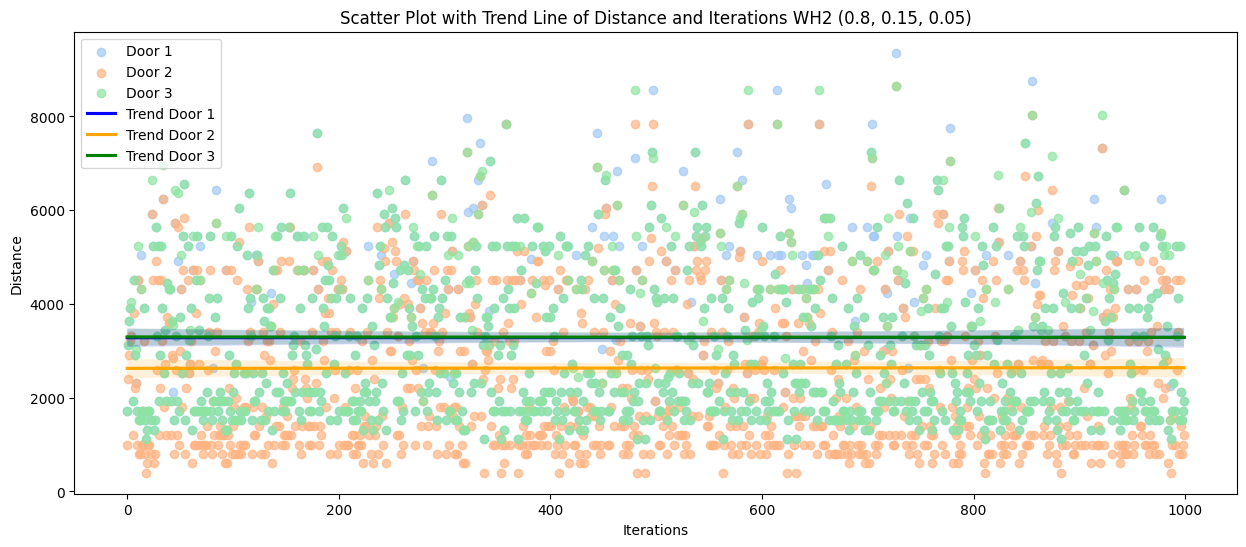

In [ ]:
# ตั้งค่าสีโดยใช้ pastel palette
sns.set_palette("pastel")

# สร้างภาพด้วย figsize
plt.figure(figsize=(15, 6))

# พล็อต scatter plot
plt.scatter(range(len(x1)), x1, label='Door 1', alpha=0.7)
plt.scatter(range(len(x2)), x2, label='Door 2', alpha=0.7)
plt.scatter(range(len(x3)), x3, label='Door 3', alpha=0.7)

# เพิ่ม trend line
sns.regplot(x=list(range(len(x1))), y=x1, scatter=False, label='Trend Door 1', color='blue')
sns.regplot(x=list(range(len(x2))), y=x2, scatter=False, label='Trend Door 2', color='orange')
sns.regplot(x=list(range(len(x3))), y=x3, scatter=False, label='Trend Door 3', color='green')

# ปรับแต่งรายละเอียด
plt.title('Scatter Plot with Trend Line of Distance and Iterations WH2 ' f'({prob_a}, {prob_b}, {prob_c})')
plt.xlabel('Iterations')
plt.ylabel('Distance')
plt.legend()

#s1_wh2 = os.path.join('/content/drive/MyDrive/is/result_pic/plot/', f'{n_r}_graph_wh2_plot.png')
#s2_wh2 = os.path.join('/content/result_pic/plot/', f'{n_r}_graph_wh2_plot.png')
#plt.savefig(s1_wh2)
#plt.savefig(s2_wh2)

# แสดงกราฟ
#plt.show()

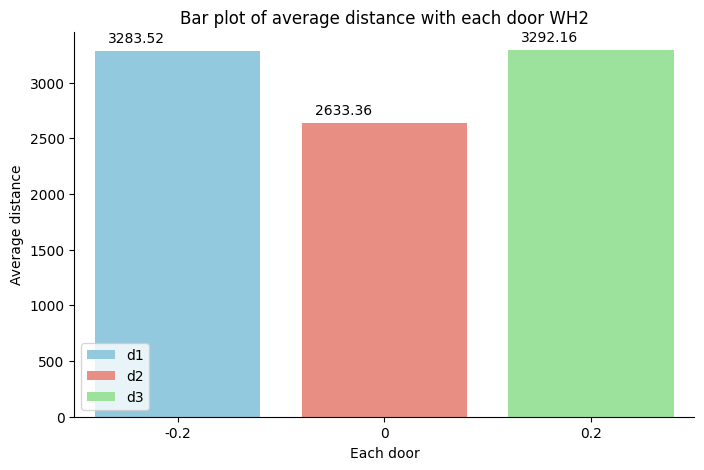

In [ ]:
# พล็อตกราฟแท่งที่ซ้อนกันด้วย Seaborn
bar_width = 0.2
index = np.arange(1)

sns.set_palette("pastel")  # กำหนดสีให้กับแผนภูมิ

plt.figure(figsize=(8, 5))  # กำหนดขนาดของกราฟ
ax = sns.barplot(x=index - bar_width, y=[avg_dis_st_wh2_d1], color="skyblue", label='d1')
sns.barplot(x=index, y=[avg_dis_st_wh2_d2], color="salmon", label='d2')
sns.barplot(x=index + bar_width, y=[avg_dis_st_wh2_d3], color="lightgreen", label='d3')

# เพิ่มตัวเลข z ลงบนแผนภูมิ
for i, value in enumerate([avg_dis_st_wh2_d1, avg_dis_st_wh2_d2, avg_dis_st_wh2_d3]):
    ax.text(i - bar_width, value + 50, f"{value:.2f}", ha='center', va='bottom', color='black', fontsize=10)

# ปรับแต่งรายละเอียด
plt.title('Bar plot of average distance with each door WH2')
plt.xlabel('Each door')
plt.ylabel('Average distance')

# ปิดเส้นพื้นหลังด้านบนและด้านข้าง
sns.despine(top=True, right=True, left=False, bottom=False)

# ปรับตำแหน่งของ legend มาที่มุมล่างซ้าย
plt.legend(loc='lower left', bbox_to_anchor=(0, 0))

#s3_wh2 = os.path.join('/content/drive/MyDrive/is/result_pic/avg/', f'{n_r}_graph_wh2_avg.png')
#s4_wh2 = os.path.join('/content/result_pic/avg/', f'{n_r}_graph_wh2_avg.png')
#plt.savefig(s3_wh2)
#plt.savefig(s4_wh2)

#plt.show()

# **Distance wh3** 📈📈📈📈

### **Process wh3** 💻

In [ ]:
#คัดลอกลิสต์ใหม่เพื่อป้องกันการอ้างอิง
all_selected_items_class_wh3 = copy.deepcopy(all_selected_items_class)

#สร้าง dict ที่มีการแปลงค่าตามเงื่อนไข
#ของ class a
value_mapping_class_a_wh3 = {}
for i in numbers_list_class_a:
    category = "A" if i % 2 == 1 else "C"
    value_mapping_class_a_wh3[i] = f"{chr(65 + (i + 1) // 2)}0{category}"
#print(f"value_mapping_class_a_wh3 = {value_mapping_class_a_wh3}")

#ของ class b
value_mapping_class_b_wh3 = {}
for i in numbers_list_class_b:
    if 11 <= i <= 24:
        category = "A" if i % 2 == 1 else "C"
        value_mapping_class_b_wh3[i] = f"{chr(65 + (i + 1) // 2)}0{category}"
    if 25 <= i <= 38:
        category = "D" if i % 2 == 1 else "F"
        value_mapping_class_b_wh3[i] = f"{chr(65 + (i - 23) // 2)}0{category}"
    if 39 <= i <= 40:
        category = "G" if i % 2 == 1 else "I"
        value_mapping_class_b_wh3[i] = f"{chr(65 + (i - 37) // 2)}0{category}"
#print(f"value_mapping_class_b_wh3 = {value_mapping_class_b_wh3}")

#ของ class c
value_mapping_class_c_wh3 = {}
for i in list(numbers_list_class_c):
    if 41 <= i <= 50:
        category = "A" if i % 2 == 1 else "C"
        value_mapping_class_c_wh3[i] = f"{chr(65 + (i - 15) // 2)}0{category}"
    if 51 <= i <= 70:
        category = "D" if i % 2 == 1 else "F"
        value_mapping_class_c_wh3[i] = f"{chr(65 + (i - 35) // 2)}0{category}"
    if 71 <= i <= 100:
        category = "G" if i % 2 == 1 else "I"
        value_mapping_class_c_wh3[i] = f"{chr(65 + (i - 67) // 2)}0{category}"
#print(f"value_mapping_class_c_wh3 = {value_mapping_class_c_wh3}")
#print("-----------**-----------")

# เปลี่ยนค่าในลิสต์ all_selected_items_class_i_wh1 ให้เป็นค่าต่าง ๆ ใน wh เช่น 1='B0D', 12='G0F', 44='D0C', ...
for sublist in all_selected_items_class_wh3:
    sublist[:] = [value_mapping_class_a_wh3.get(val, val) for val in sublist]
for sublist in all_selected_items_class_wh3:
    sublist[:] = [value_mapping_class_b_wh3.get(val, val) for val in sublist]
for sublist in all_selected_items_class_wh3:
    sublist[:] = [value_mapping_class_c_wh3.get(val, val) for val in sublist]

# พิมพ์ค่าทั้งหมด
print(f"Selected Items Class: {all_selected_items_class}")
print(f"Selected Items Class: {all_selected_items_class_wh3}")

Selected Items Class: [[3, 5, 2, 6], [4, 3, 6, 24], [2, 9, 48, 2], [6, 24, 2, 9], [53, 3, 9, 3], [10, 5, 3, 6], [10, 4, 3, 31], [8, 6, 5, 19], [8, 3, 1, 46], [6, 10, 5, 1], [36, 10, 6, 8], [1, 3, 8, 1], [7, 4, 1, 2], [2, 7, 8, 39], [5, 2, 1, 5], [5, 9, 8, 5], [18, 8, 22, 9], [8, 5, 5, 5], [3, 2, 2, 2], [5, 5, 5, 3], [6, 1, 3, 5], [4, 5, 8, 10], [8, 5, 3, 2], [2, 26, 9, 35], [4, 5, 39, 4], [3, 3, 6, 2], [6, 8, 6, 5], [10, 68, 7, 6], [9, 8, 10, 24], [8, 38, 10, 1], [8, 4, 7, 2], [18, 5, 9, 2], [8, 35, 10, 2], [1, 5, 8, 32], [3, 39, 10, 47], [9, 2, 10, 4], [7, 10, 75, 2], [2, 10, 3, 5], [2, 55, 10, 5], [5, 31, 5, 10], [31, 5, 2, 5], [7, 5, 9, 7], [2, 6, 80, 3], [70, 6, 6, 43], [5, 1, 3, 3], [69, 3, 8, 17], [5, 25, 3, 4], [8, 3, 1, 5], [54, 7, 6, 56], [2, 7, 9, 8], [26, 2, 6, 5], [3, 5, 5, 35], [10, 2, 10, 5], [10, 5, 59, 7], [9, 40, 54, 6], [6, 8, 2, 2], [8, 18, 4, 8], [5, 35, 20, 6], [2, 1, 5, 49], [49, 3, 8, 8], [5, 5, 7, 32], [1, 5, 2, 2], [3, 7, 2, 36], [8, 3, 5, 6], [3, 1, 6, 8], [1,

In [ ]:
# ตัวแปรที่ใช้เก็บผลลัพธ์
results_wh3_new_map = []

# เงื่อนไขการเลือก doors
chosen_doors_wh3_list = []
for choose_door_wh3 in range(1, 4):
    # สร้างตัวแปร chosen_doors_wh1 และเก็บค่าตามเงื่อนไข
    if choose_door_wh3 == 1:
        chosen_doors_wh3 = ['A0B']
    elif choose_door_wh3 == 2:
        chosen_doors_wh3 = ['A0E']
    elif choose_door_wh3 == 3:
        chosen_doors_wh3 = ['A0H']
    else:
        raise ValueError(f"Invalid value for choose_door: {choose_door_wh3}")

    # เก็บ chosen_doors_wh3 ใน list
    chosen_doors_wh3_list.append(chosen_doors_wh3)

    # นำ list มาต่อกัน
    result_wh3 = []
    for item_wh3 in all_selected_items_class_wh3:
        result_wh3.append(chosen_doors_wh3 + item_wh3 + chosen_doors_wh3)

    # ปรับปรุง result_wh1 โดยใช้ mapping
    result_map_wh3 = [[mapping[val] if val in mapping else val for val in sublist] for sublist in result_wh3]

    results_wh3_new_map.append(result_map_wh3)

    # แสดงผลลัพธ์
    print(f'Chosen Doors {choose_door_wh3}')
    print(result_wh3)
print()

Chosen Doors 1
[['A0B', 'C0A', 'D0A', 'B0C', 'D0C', 'A0B'], ['A0B', 'C0C', 'C0A', 'D0C', 'M0C', 'A0B'], ['A0B', 'B0C', 'F0A', 'Q0C', 'B0C', 'A0B'], ['A0B', 'D0C', 'M0C', 'B0C', 'F0A', 'A0B'], ['A0B', 'J0D', 'C0A', 'F0A', 'C0A', 'A0B'], ['A0B', 'F0C', 'D0A', 'C0A', 'D0C', 'A0B'], ['A0B', 'F0C', 'C0C', 'C0A', 'E0D', 'A0B'], ['A0B', 'E0C', 'D0C', 'D0A', 'K0A', 'A0B'], ['A0B', 'E0C', 'C0A', 'B0A', 'P0C', 'A0B'], ['A0B', 'D0C', 'F0C', 'D0A', 'B0A', 'A0B'], ['A0B', 'G0F', 'F0C', 'D0C', 'E0C', 'A0B'], ['A0B', 'B0A', 'C0A', 'E0C', 'B0A', 'A0B'], ['A0B', 'E0A', 'C0C', 'B0A', 'B0C', 'A0B'], ['A0B', 'B0C', 'E0A', 'E0C', 'B0G', 'A0B'], ['A0B', 'D0A', 'B0C', 'B0A', 'D0A', 'A0B'], ['A0B', 'D0A', 'F0A', 'E0C', 'D0A', 'A0B'], ['A0B', 'J0C', 'E0C', 'L0C', 'F0A', 'A0B'], ['A0B', 'E0C', 'D0A', 'D0A', 'D0A', 'A0B'], ['A0B', 'C0A', 'B0C', 'B0C', 'B0C', 'A0B'], ['A0B', 'D0A', 'D0A', 'D0A', 'C0A', 'A0B'], ['A0B', 'D0C', 'B0A', 'C0A', 'D0A', 'A0B'], ['A0B', 'C0C', 'D0A', 'E0C', 'F0C', 'A0B'], ['A0B', 'E0C', '

## **Plt wh3** 📦

In [ ]:
G_wh3 = G_OG

[('A0B', 'B0B', 100), ('A0E', 'B0E', 100), ('A0H', 'B0H', 100), ('B0B', 'C0B', 100), ('B0E', 'C0E', 100), ('B0H', 'C0H', 100), ('C0B', 'D0B', 100), ('C0E', 'D0E', 100), ('C0H', 'D0H', 100), ('D0B', 'E0B', 100), ('D0E', 'E0E', 100), ('D0H', 'E0H', 100), ('E0B', 'F0B', 100), ('E0E', 'F0E', 100), ('E0H', 'F0H', 100), ('F0B', 'G0B', 100), ('F0E', 'G0E', 100), ('F0H', 'G0H', 100), ('G0B', 'H0B', 100), ('G0E', 'H0E', 100), ('G0H', 'H0H', 100), ('H0B', 'I0B', 100), ('H0E', 'I0E', 100), ('H0H', 'I0H', 100), ('I0B', 'J0B', 100), ('I0E', 'J0E', 100), ('I0H', 'J0H', 100), ('J0B', 'K0B', 100), ('J0E', 'K0E', 100), ('J0H', 'K0H', 100), ('K0B', 'L0B', 100), ('K0E', 'L0E', 100), ('K0H', 'L0H', 100), ('L0B', 'M0B', 100), ('L0E', 'M0E', 100), ('L0H', 'M0H', 100), ('M0B', 'N0B', 100), ('M0E', 'N0E', 100), ('M0H', 'N0H', 100), ('N0B', 'O0B', 100), ('N0E', 'O0E', 100), ('N0H', 'O0H', 100), ('O0B', 'P0B', 100), ('O0E', 'P0E', 100), ('O0H', 'P0H', 100), ('P0B', 'Q0B', 100), ('P0E', 'Q0E', 100), ('P0H', 'Q0H

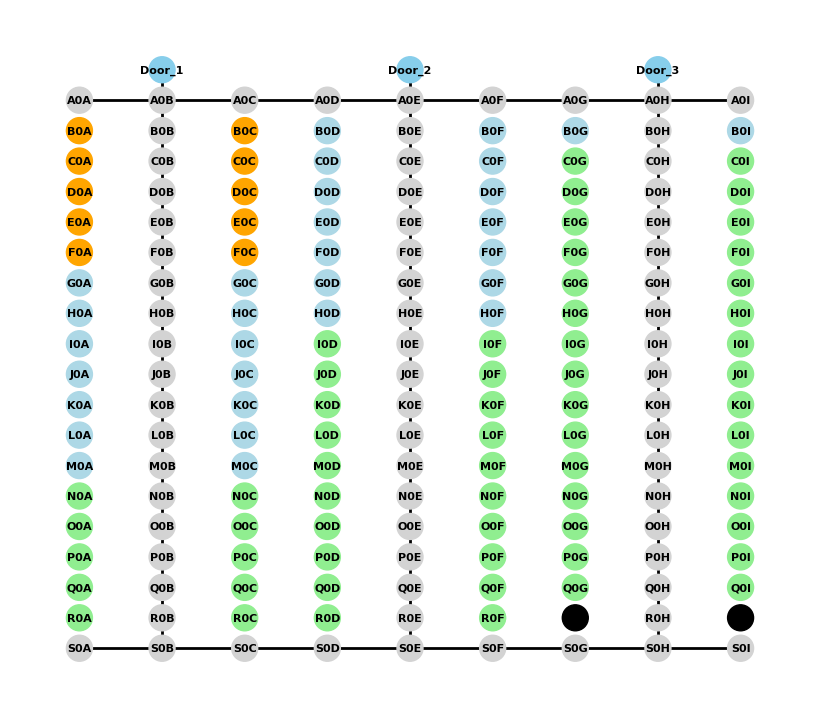

In [ ]:
G_wh3

# Example usage:
node_colors = []
for node in G_wh3.nodes():
    if node.startswith('Door'):
        node_colors.append('skyblue')
    elif node in ['A0A', 'A0B', 'A0C', 'A0D', 'A0E', 'A0F', 'A0G', 'A0H', 'A0I']:
        node_colors.append('lightgray')
    #cols 1
    elif any(node.startswith(f"{AA}0A") for AA in 'BCDEF'):
        node_colors.append('orange')
    elif any(node.startswith(f"{BA}0A") for BA in 'GHIJKLM'):
        node_colors.append('lightblue')
    elif any(node.startswith(f"{CA}0A") for CA in 'NOPQR'):
        node_colors.append('lightgreen')
    #cols 2(ทางเดิน)
    elif node in [f"{char_value}0B" for char_value in 'BCDEFGHIJKLMNOPQRSTUVWXYZ']:
        node_colors.append('lightgray')
    #cols 3
    elif any(node.startswith(f"{AC}0C") for AC in 'BCDEF'):
        node_colors.append('orange')
    elif any(node.startswith(f"{BC}0C") for BC in 'GHIJKLM'):
        node_colors.append('lightblue')
    elif any(node.startswith(f"{CC}0C") for CC in 'NOPQR'):
        node_colors.append('lightgreen')
    #cols 4
    elif any(node.startswith(f"{BD}0D") for BD in 'BCDEFGH'):
        node_colors.append('lightblue')
    elif any(node.startswith(f"{CD}0D") for CD in 'IJKLMNOPQR'):
        node_colors.append('lightgreen')
    #cols 5(ทางเดิน)
    elif node in [f"{char_value}0E" for char_value in 'BCDEFGHIJKLMNOPQRSTUVWXYZ']:
        node_colors.append('lightgray')
    #cols 6
    elif any(node.startswith(f"{BF}0F") for BF in 'BCDEFGH'):
        node_colors.append('lightblue')
    elif any(node.startswith(f"{CF}0F") for CF in 'IJKLMNOPQR'):
        node_colors.append('lightgreen')
    #cols 7
    elif any(node.startswith(f"{BG}0G") for BG in 'B'):
        node_colors.append('lightblue')
    elif any(node.startswith(f"{CG}0G") for CG in 'CDEFGHIJKLMNOPQ'):
        node_colors.append('lightgreen')
    #cols 8(ทางเดิน)
    elif node in [f"{char_value}0H" for char_value in 'BCDEFGHIJKLMNOPQRSTUVWXYZ']:
        node_colors.append('lightgray')
    #cols 9
    elif any(node.startswith(f"{BI}0I") for BI in 'B'):
        node_colors.append('lightblue')
    elif any(node.startswith(f"{CI}0I") for CI in 'CDEFGHIJKLMNOPQ'):
        node_colors.append('lightgreen')
    #แถวสุดท้าย
    elif node in [f"{char_value}0A", f"{char_value}0B", f"{char_value}0C", f"{char_value}0D", f"{char_value}0E", f"{char_value}0F", f"{char_value}0G", f"{char_value}0H", f"{char_value}0I"]:
        node_colors.append('lightgray')
    else:
        node_colors.append('black')

edges_wh3 = edges
print(edges_wh3)

plt.figure(figsize=(8, 7))
pos = node_positions
nx.draw(G_wh3, pos, with_labels=True, font_weight='bold', node_color=node_colors, node_size=350, font_size=8, font_color='black',
        font_family='sans-serif', edge_color='Black', width=2, edge_cmap=plt.cm.Blues)

#plt.savefig('/content/drive/MyDrive/is/graph/network_graph_wh3.png')
#plt.savefig('/content/graph/network_graph_wh3.png')

# Show the graph
#plt.show()

## **Dis wh3** 📊

In [ ]:
new_wh3 = []
for inner_list in results_wh3_new_map:
  for j in range(num_iterations):
    new_wh3.append(inner_list[j])
#new_wh3

In [ ]:
nested_list_wh3 = new_wh3
dis_wh3 = []
for i in range(len(nested_list_wh3)):
    for j in range(1, len(nested_list_wh3[i])):  # แก้ loop range จาก 0 เป็น 1
        start_node = nested_list_wh3[i][j-1]
        end_node = nested_list_wh3[i][j]
        # Assuming G_wh1 is defined somewhere in your code
        shortest_path = nx.shortest_path(G_wh3, source=start_node, target=end_node, weight='weight')
        # Find the weight of the shortest path
        shortest_path_weight = nx.shortest_path_length(G_wh3, source=start_node, target=end_node, weight='weight')
        dis_wh3.append(shortest_path_weight)
print(dis_wh3)

# สร้างลิสต์สำหรับเก็บผลลัพธ์
result_list_wh3 = []
# ใช้ลูป for เพื่อนำค่าบวกกันในแต่ละกลุ่ม
for i in range(0, len(dis_wh3), num_items_to_pick+1):
    group = dis_wh3[i:i+num_items_to_pick+1]
    group_sum = sum(group)
    result_list_wh3.append(group_sum)
print(result_list_wh3)

[200, 100, 200, 200, 300, 200, 0, 100, 900, 1200, 100, 400, 1100, 1500, 100, 300, 900, 1100, 400, 500, 1260, 1460, 300, 300, 200, 500, 200, 100, 100, 300, 500, 300, 0, 960, 760, 400, 100, 0, 700, 1000, 400, 200, 100, 1400, 1500, 300, 200, 200, 200, 100, 960, 1460, 200, 100, 400, 100, 100, 200, 300, 100, 300, 100, 100, 0, 100, 100, 200, 100, 1220, 820, 300, 200, 0, 200, 300, 300, 200, 100, 100, 300, 900, 500, 700, 600, 500, 400, 100, 0, 0, 300, 200, 100, 0, 0, 100, 300, 0, 0, 100, 200, 300, 200, 100, 100, 300, 200, 100, 100, 100, 500, 400, 100, 100, 100, 100, 100, 560, 960, 1460, 960, 200, 100, 1120, 1020, 200, 200, 0, 100, 200, 100, 300, 100, 100, 0, 300, 500, 1860, 2060, 0, 300, 500, 100, 100, 700, 1200, 400, 1460, 1560, 400, 100, 400, 200, 100, 200, 100, 900, 600, 200, 400, 100, 400, 1360, 1460, 400, 100, 100, 200, 100, 1160, 760, 200, 1020, 1320, 1100, 1600, 500, 400, 400, 300, 200, 300, 200, 1620, 1220, 100, 100, 400, 300, 100, 300, 100, 1460, 1860, 200, 300, 300, 1060, 1060, 200, 

In [ ]:
new_wh3
result_list_wh3
average_distance_wh3_all = []
for choose_door_wh3 in range(1, 4):
    #print(f"ประตูที่ {choose_door_wh3}")

    total_distance_wh3 = 0  # ต้องรีเซ็ตค่า total_distance_wh1 ทุกรอบ
    for i in range(1, num_iterations + 1):
        path = new_wh3[(choose_door_wh3 - 1) * num_iterations + i - 1]
        distance_wh3 = result_list_wh3[(choose_door_wh3 - 1) * num_iterations + i - 1]

        total_distance_wh3 += distance_wh3
        average_distance_wh3 = total_distance_wh3 / i if i != 0 else 0
        average_distance_wh3_all.append(float(average_distance_wh3))

        #print(f"รอบการสุ่มที่ {i} ทางเดินที่: {path} ได้ระยะทางที่สั้นที่สุดคือ {distance_wh3}")
    #print(f">> ระยะทางเฉลี่ย: {average_distance_wh3}")

## **Result_wh3** 🍻

In [ ]:
# ใช้ numpy.array_split เพื่อแบ่งลิสต์เป็นกลุ่มที่เท่ากัน
groups_wh3 = np.array_split(result_list_wh3, 3)

# กำหนดค่าในตัวแปร y1, y2, y3 นอกลูป
y1, y2, y3 = groups_wh3

# พิมพ์ผลลัพธ์ในลูป for
dd = []
for i, group in enumerate(groups_wh3, start=1):
    dd.append(group)
    #print(f"y{i} =", group)

avg_dis_st_wh3_d1 = np.mean(y1)
avg_dis_st_wh3_d2 = np.mean(y2)
avg_dis_st_wh3_d3 = np.mean(y3)

# สร้างตัวแปร
avg_dis_st_wh3_d1_ = avg_dis_st_wh3_d1
avg_dis_st_wh3_d2_ = avg_dis_st_wh3_d2
avg_dis_st_wh3_d3_ = avg_dis_st_wh3_d3

# เขียนค่าลงในไฟล์ .txt
file_path_drive = os.path.join('/content/drive/MyDrive/is/result_avg_dis/each_dis/', f'{n_r}_result_avg_dis_wh3.txt')
with open(file_path_drive, 'w') as file:
    file.write('\n'.join(map(str, [avg_dis_st_wh3_d1_, avg_dis_st_wh3_d2_, avg_dis_st_wh3_d3_])))

#file_path_local = os.path.join('/content/result_avg_dis/', f'{n_r}_result_avg_dis_wh3.txt')
#with open(file_path_local, 'w') as file:
#    file.write('\n'.join(map(str, [avg_dis_st_wh3_d1_, avg_dis_st_wh3_d2_, avg_dis_st_wh3_d3_])))

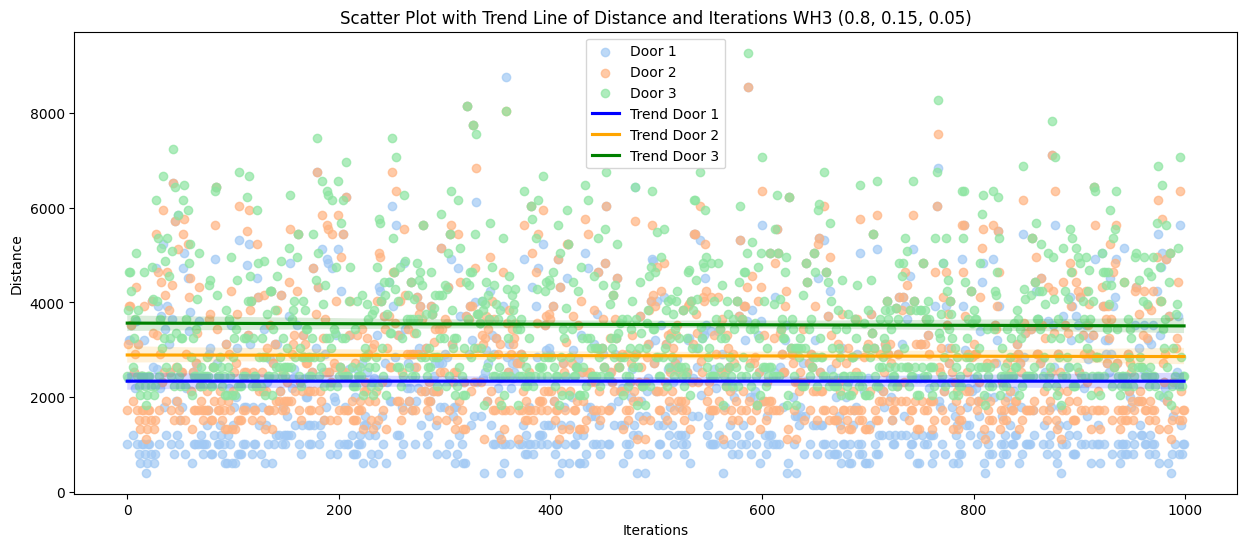

In [ ]:
# ตั้งค่าสีโดยใช้ pastel palette
sns.set_palette("pastel")

# สร้างภาพด้วย figsize
plt.figure(figsize=(15, 6))

# พล็อต scatter plot
plt.scatter(range(len(y1)), y1, label='Door 1', alpha=0.7)
plt.scatter(range(len(y2)), y2, label='Door 2', alpha=0.7)
plt.scatter(range(len(y3)), y3, label='Door 3', alpha=0.7)

# เพิ่ม trend line
sns.regplot(x=list(range(len(y1))), y=y1, scatter=False, label='Trend Door 1', color='blue')
sns.regplot(x=list(range(len(y2))), y=y2, scatter=False, label='Trend Door 2', color='orange')
sns.regplot(x=list(range(len(y3))), y=y3, scatter=False, label='Trend Door 3', color='green')

# ปรับแต่งรายละเอียด
plt.title('Scatter Plot with Trend Line of Distance and Iterations WH3 ' f'({prob_a}, {prob_b}, {prob_c})')
plt.xlabel('Iterations')
plt.ylabel('Distance')
plt.legend()

#s1_wh3 = os.path.join('/content/drive/MyDrive/is/result_pic/plot/', f'{n_r}_graph_wh3_plot.png')
#s2_wh3 = os.path.join('/content/result_pic/plot/', f'{n_r}_graph_wh3_plot.png')
#plt.savefig(s1_wh3)
#plt.savefig(s2_wh3)

# แสดงกราฟ
#plt.show()

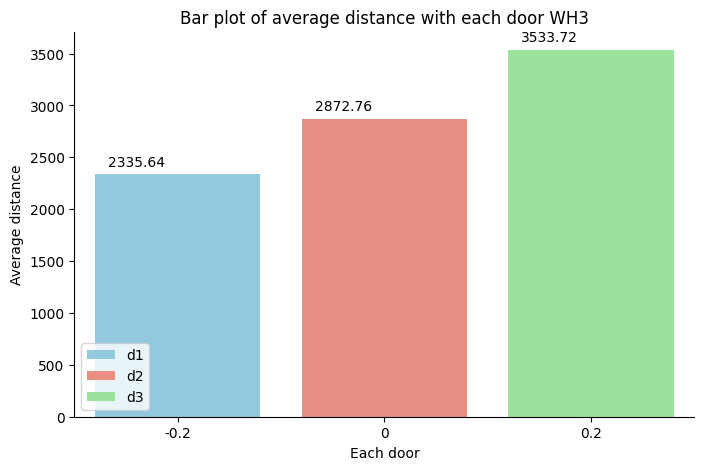

In [ ]:
# พล็อตกราฟแท่งที่ซ้อนกันด้วย Seaborn
bar_width = 0.2
index = np.arange(1)

sns.set_palette("pastel")  # กำหนดสีให้กับแผนภูมิ

plt.figure(figsize=(8, 5))  # กำหนดขนาดของกราฟ
ax = sns.barplot(x=index - bar_width, y=[avg_dis_st_wh3_d1], color="skyblue", label='d1')
sns.barplot(x=index, y=[avg_dis_st_wh3_d2], color="salmon", label='d2')
sns.barplot(x=index + bar_width, y=[avg_dis_st_wh3_d3], color="lightgreen", label='d3')

# เพิ่มตัวเลข z ลงบนแผนภูมิ
for i, value in enumerate([avg_dis_st_wh3_d1, avg_dis_st_wh3_d2, avg_dis_st_wh3_d3]):
    ax.text(i - bar_width, value + 50, f"{value:.2f}", ha='center', va='bottom', color='black', fontsize=10)

# ปรับแต่งรายละเอียด
plt.title('Bar plot of average distance with each door WH3')
plt.xlabel('Each door')
plt.ylabel('Average distance')

# ปิดเส้นพื้นหลังด้านบนและด้านข้าง
sns.despine(top=True, right=True, left=False, bottom=False)

# ปรับตำแหน่งของ legend มาที่มุมล่างซ้าย
plt.legend(loc='lower left', bbox_to_anchor=(0, 0))

#s3_wh3 = os.path.join('/content/drive/MyDrive/is/result_pic/avg/', f'{n_r}_graph_wh3_avg.png')
#s4_wh3 = os.path.join('/content/result_pic/avg/', f'{n_r}_graph_wh3_avg.png')
#plt.savefig(s3_wh3)
#plt.savefig(s4_wh3)

#plt.show()

# **Distance wh4** 📈📈📈📈

### **Process wh4** 💻

In [ ]:
#คัดลอกลิสต์ใหม่เพื่อป้องกันการอ้างอิง
all_selected_items_class_wh4 = copy.deepcopy(all_selected_items_class)

#สร้าง dict ที่มีการแปลงค่าตามเงื่อนไข
#ของ class a
value_mapping_class_a_wh4 = {}
for i in numbers_list_class_a:
    category = "A" if i % 2 == 1 else "C"
    value_mapping_class_a_wh4[i] = f"{chr(65 + (i + 1) // 2)}0{category}"
#print(f"value_mapping_class_a_wh4 = {value_mapping_class_a_wh4}")

#ของ class b
value_mapping_class_b_wh4 = {}
for i in numbers_list_class_b:
    if 11 <= i <= 34:
        category = "A" if i % 2 == 1 else "C"
        value_mapping_class_b_wh4[i] = f"{chr(65 + (i + 1) // 2)}0{category}"
    if 35 <= i <= 40:
        category = "D" if i % 2 == 1 else "F"
        value_mapping_class_b_wh4[i] = f"{chr(65 + (i - 5) // 2)}0{category}"
#print(f"value_mapping_class_b_wh4 = {value_mapping_class_b_wh4}")

#ของ class c
value_mapping_class_c_wh4 = {}
for i in list(numbers_list_class_c):
    if 41 <= i <= 68:
        category = "D" if i % 2 == 1 else "F"
        value_mapping_class_c_wh4[i] = f"{chr(65 + (i - 39) // 2)}0{category}"
    if 69 <= i <= 100:
        category = "G" if i % 2 == 1 else "I"
        value_mapping_class_c_wh4[i] = f"{chr(65 + (i - 67) // 2)}0{category}"
#print(f"value_mapping_class_c_wh4 = {value_mapping_class_c_wh4}")
#print("-----------**-----------")

# เปลี่ยนค่าในลิสต์ all_selected_items_class_i_wh4 ให้เป็นค่าต่าง ๆ ใน wh เช่น 1='B0D', 12='G0F', 44='D0C', ...
for sublist in all_selected_items_class_wh4:
    sublist[:] = [value_mapping_class_a_wh4.get(val, val) for val in sublist]
for sublist in all_selected_items_class_wh4:
    sublist[:] = [value_mapping_class_b_wh4.get(val, val) for val in sublist]
for sublist in all_selected_items_class_wh4:
    sublist[:] = [value_mapping_class_c_wh4.get(val, val) for val in sublist]

# พิมพ์ค่าทั้งหมด
print(f"Selected Items Class: {all_selected_items_class}")
print(f"Selected Items Class: {all_selected_items_class_wh4}")

Selected Items Class: [[3, 5, 2, 6], [4, 3, 6, 24], [2, 9, 48, 2], [6, 24, 2, 9], [53, 3, 9, 3], [10, 5, 3, 6], [10, 4, 3, 31], [8, 6, 5, 19], [8, 3, 1, 46], [6, 10, 5, 1], [36, 10, 6, 8], [1, 3, 8, 1], [7, 4, 1, 2], [2, 7, 8, 39], [5, 2, 1, 5], [5, 9, 8, 5], [18, 8, 22, 9], [8, 5, 5, 5], [3, 2, 2, 2], [5, 5, 5, 3], [6, 1, 3, 5], [4, 5, 8, 10], [8, 5, 3, 2], [2, 26, 9, 35], [4, 5, 39, 4], [3, 3, 6, 2], [6, 8, 6, 5], [10, 68, 7, 6], [9, 8, 10, 24], [8, 38, 10, 1], [8, 4, 7, 2], [18, 5, 9, 2], [8, 35, 10, 2], [1, 5, 8, 32], [3, 39, 10, 47], [9, 2, 10, 4], [7, 10, 75, 2], [2, 10, 3, 5], [2, 55, 10, 5], [5, 31, 5, 10], [31, 5, 2, 5], [7, 5, 9, 7], [2, 6, 80, 3], [70, 6, 6, 43], [5, 1, 3, 3], [69, 3, 8, 17], [5, 25, 3, 4], [8, 3, 1, 5], [54, 7, 6, 56], [2, 7, 9, 8], [26, 2, 6, 5], [3, 5, 5, 35], [10, 2, 10, 5], [10, 5, 59, 7], [9, 40, 54, 6], [6, 8, 2, 2], [8, 18, 4, 8], [5, 35, 20, 6], [2, 1, 5, 49], [49, 3, 8, 8], [5, 5, 7, 32], [1, 5, 2, 2], [3, 7, 2, 36], [8, 3, 5, 6], [3, 1, 6, 8], [1,

In [ ]:
# ตัวแปรที่ใช้เก็บผลลัพธ์
results_wh4_new_map = []

# เงื่อนไขการเลือก doors
chosen_doors_wh4_list = []
for choose_door_wh4 in range(1, 4):
    # สร้างตัวแปร chosen_doors_wh4 และเก็บค่าตามเงื่อนไข
    if choose_door_wh4 == 1:
        chosen_doors_wh4 = ['A0B']
    elif choose_door_wh4 == 2:
        chosen_doors_wh4 = ['A0E']
    elif choose_door_wh4 == 3:
        chosen_doors_wh4 = ['A0H']
    else:
        raise ValueError(f"Invalid value for choose_door: {choose_door_wh4}")

    # เก็บ chosen_doors_wh1 ใน list
    chosen_doors_wh4_list.append(chosen_doors_wh4)

    # นำ list มาต่อกัน
    result_wh4 = []
    for item_wh4 in all_selected_items_class_wh4:
        result_wh4.append(chosen_doors_wh4 + item_wh4 + chosen_doors_wh4)

    # ปรับปรุง result_wh4 โดยใช้ mapping
    result_map_wh4 = [[mapping[val] if val in mapping else val for val in sublist] for sublist in result_wh4]

    results_wh4_new_map.append(result_map_wh4)

    # แสดงผลลัพธ์
    print(f'Chosen Doors {choose_door_wh4}')
    print(result_wh4)
print()

Chosen Doors 1
[['A0B', 'C0A', 'D0A', 'B0C', 'D0C', 'A0B'], ['A0B', 'C0C', 'C0A', 'D0C', 'M0C', 'A0B'], ['A0B', 'B0C', 'F0A', 'E0F', 'B0C', 'A0B'], ['A0B', 'D0C', 'M0C', 'B0C', 'F0A', 'A0B'], ['A0B', 'H0D', 'C0A', 'F0A', 'C0A', 'A0B'], ['A0B', 'F0C', 'D0A', 'C0A', 'D0C', 'A0B'], ['A0B', 'F0C', 'C0C', 'C0A', 'Q0A', 'A0B'], ['A0B', 'E0C', 'D0C', 'D0A', 'K0A', 'A0B'], ['A0B', 'E0C', 'C0A', 'B0A', 'D0F', 'A0B'], ['A0B', 'D0C', 'F0C', 'D0A', 'B0A', 'A0B'], ['A0B', 'P0F', 'F0C', 'D0C', 'E0C', 'A0B'], ['A0B', 'B0A', 'C0A', 'E0C', 'B0A', 'A0B'], ['A0B', 'E0A', 'C0C', 'B0A', 'B0C', 'A0B'], ['A0B', 'B0C', 'E0A', 'E0C', 'R0D', 'A0B'], ['A0B', 'D0A', 'B0C', 'B0A', 'D0A', 'A0B'], ['A0B', 'D0A', 'F0A', 'E0C', 'D0A', 'A0B'], ['A0B', 'J0C', 'E0C', 'L0C', 'F0A', 'A0B'], ['A0B', 'E0C', 'D0A', 'D0A', 'D0A', 'A0B'], ['A0B', 'C0A', 'B0C', 'B0C', 'B0C', 'A0B'], ['A0B', 'D0A', 'D0A', 'D0A', 'C0A', 'A0B'], ['A0B', 'D0C', 'B0A', 'C0A', 'D0A', 'A0B'], ['A0B', 'C0C', 'D0A', 'E0C', 'F0C', 'A0B'], ['A0B', 'E0C', '

## **Plt wh4** 📦

In [ ]:
G_wh4 = G_OG

[('A0B', 'B0B', 100), ('A0E', 'B0E', 100), ('A0H', 'B0H', 100), ('B0B', 'C0B', 100), ('B0E', 'C0E', 100), ('B0H', 'C0H', 100), ('C0B', 'D0B', 100), ('C0E', 'D0E', 100), ('C0H', 'D0H', 100), ('D0B', 'E0B', 100), ('D0E', 'E0E', 100), ('D0H', 'E0H', 100), ('E0B', 'F0B', 100), ('E0E', 'F0E', 100), ('E0H', 'F0H', 100), ('F0B', 'G0B', 100), ('F0E', 'G0E', 100), ('F0H', 'G0H', 100), ('G0B', 'H0B', 100), ('G0E', 'H0E', 100), ('G0H', 'H0H', 100), ('H0B', 'I0B', 100), ('H0E', 'I0E', 100), ('H0H', 'I0H', 100), ('I0B', 'J0B', 100), ('I0E', 'J0E', 100), ('I0H', 'J0H', 100), ('J0B', 'K0B', 100), ('J0E', 'K0E', 100), ('J0H', 'K0H', 100), ('K0B', 'L0B', 100), ('K0E', 'L0E', 100), ('K0H', 'L0H', 100), ('L0B', 'M0B', 100), ('L0E', 'M0E', 100), ('L0H', 'M0H', 100), ('M0B', 'N0B', 100), ('M0E', 'N0E', 100), ('M0H', 'N0H', 100), ('N0B', 'O0B', 100), ('N0E', 'O0E', 100), ('N0H', 'O0H', 100), ('O0B', 'P0B', 100), ('O0E', 'P0E', 100), ('O0H', 'P0H', 100), ('P0B', 'Q0B', 100), ('P0E', 'Q0E', 100), ('P0H', 'Q0H

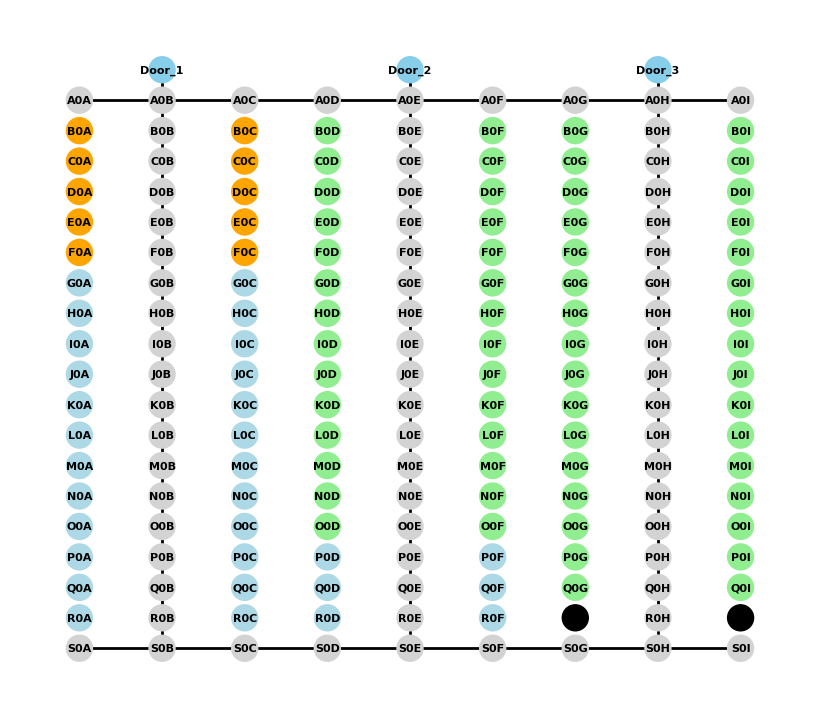

In [ ]:
G_wh4

# Example usage:
node_colors = []
for node in G_wh4.nodes():
    if node.startswith('Door'):
        node_colors.append('skyblue')
    elif node in ['A0A', 'A0B', 'A0C', 'A0D', 'A0E', 'A0F', 'A0G', 'A0H', 'A0I']:
        node_colors.append('lightgray')
    #cols 1
    elif any(node.startswith(f"{AA}0A") for AA in 'BCDEF'):
        node_colors.append('orange')
    elif any(node.startswith(f"{BA}0A") for BA in 'GHIJKLMNOPQR'):
        node_colors.append('lightblue')
    #cols 2(ทางเดิน)
    elif node in [f"{char_value}0B" for char_value in 'BCDEFGHIJKLMNOPQRSTUVWXYZ']:
        node_colors.append('lightgray')
    #cols 3
    elif any(node.startswith(f"{AC}0C") for AC in 'BCDEF'):
        node_colors.append('orange')
    elif any(node.startswith(f"{BC}0C") for BC in 'GHIJKLMNOPQR'):
        node_colors.append('lightblue')
    #cols 4
    elif any(node.startswith(f"{CD}0D") for CD in 'BCDEFGHIJKLMNO'):
        node_colors.append('lightgreen')
    elif any(node.startswith(f"{BD}0D") for BD in 'PQR'):
        node_colors.append('lightblue')
    #cols 5(ทางเดิน)
    elif node in [f"{char_value}0E" for char_value in 'BCDEFGHIJKLMNOPQRSTUVWXYZ']:
        node_colors.append('lightgray')
    #cols 6
    elif any(node.startswith(f"{CF}0F") for CF in 'BCDEFGHIJKLMNO'):
        node_colors.append('lightgreen')
    elif any(node.startswith(f"{BF}0F") for BF in 'PQR'):
        node_colors.append('lightblue')
    #cols 7
    elif any(node.startswith(f"{CG}0G") for CG in 'BCDEFGHIJKLMNOPQ'):
        node_colors.append('lightgreen')
    #cols 8(ทางเดิน)
    elif node in [f"{char_value}0H" for char_value in 'BCDEFGHIJKLMNOPQRSTUVWXYZ']:
        node_colors.append('lightgray')
    #cols 9
    elif any(node.startswith(f"{CI}0I") for CI in 'BCDEFGHIJKLMNOPQ'):
        node_colors.append('lightgreen')
    #แถวสุดท้าย
    elif node in [f"{char_value}0A", f"{char_value}0B", f"{char_value}0C", f"{char_value}0D", f"{char_value}0E", f"{char_value}0F", f"{char_value}0G", f"{char_value}0H", f"{char_value}0I"]:
        node_colors.append('lightgray')
    else:
        node_colors.append('black')

edges_wh4 = edges
print(edges_wh4)

plt.figure(figsize=(8, 7))
pos = node_positions
nx.draw(G_wh4, pos, with_labels=True, font_weight='bold', node_color=node_colors, node_size=350, font_size=8, font_color='black',
        font_family='sans-serif', edge_color='Black', width=2, edge_cmap=plt.cm.Blues)

#plt.savefig('/content/drive/MyDrive/is/graph/network_graph_wh4.png')
#plt.savefig('/content/graph/network_graph_wh4.png')

# Show the graph
#plt.show()

## **Dis wh4** 📊

In [ ]:
new_wh4 = []
for inner_list in results_wh4_new_map:
  for j in range(num_iterations):
    new_wh4.append(inner_list[j])
#new_wh4

In [ ]:
nested_list_wh4 = new_wh4
dis_wh4 = []
for i in range(len(nested_list_wh4)):
    for j in range(1, len(nested_list_wh4[i])):  # แก้ loop range จาก 0 เป็น 1
        start_node = nested_list_wh4[i][j-1]
        end_node = nested_list_wh4[i][j]
        # Assuming G_wh1 is defined somewhere in your code
        shortest_path = nx.shortest_path(G_wh4, source=start_node, target=end_node, weight='weight')
        # Find the weight of the shortest path
        shortest_path_weight = nx.shortest_path_length(G_wh4, source=start_node, target=end_node, weight='weight')
        dis_wh4.append(shortest_path_weight)
print(dis_wh4)

# สร้างลิสต์สำหรับเก็บผลลัพธ์
result_list_wh4 = []
# ใช้ลูป for เพื่อนำค่าบวกกันในแต่ละกลุ่ม
for i in range(0, len(dis_wh4), num_items_to_pick+1):
    group = dis_wh4[i:i+num_items_to_pick+1]
    group_sum = sum(group)
    result_list_wh4.append(group_sum)
print(result_list_wh4)

[200, 100, 200, 200, 300, 200, 0, 100, 900, 1200, 100, 400, 1260, 860, 100, 300, 900, 1100, 400, 500, 1060, 1260, 300, 300, 200, 500, 200, 100, 100, 300, 500, 300, 0, 1400, 1600, 400, 100, 0, 700, 1000, 400, 200, 100, 760, 660, 300, 200, 200, 200, 100, 1860, 1960, 200, 100, 400, 100, 100, 200, 300, 100, 300, 100, 100, 0, 100, 100, 200, 100, 1860, 2060, 300, 200, 0, 200, 300, 300, 200, 100, 100, 300, 900, 500, 700, 600, 500, 400, 100, 0, 0, 300, 200, 100, 0, 0, 100, 300, 0, 0, 100, 200, 300, 200, 100, 100, 300, 200, 100, 100, 100, 500, 400, 100, 100, 100, 100, 100, 1200, 800, 1960, 1860, 200, 100, 1960, 2060, 200, 200, 0, 100, 200, 100, 300, 100, 100, 0, 300, 500, 2060, 2060, 0, 300, 500, 100, 100, 700, 1200, 400, 1960, 1860, 400, 100, 400, 200, 100, 200, 100, 900, 600, 200, 400, 100, 400, 2060, 1960, 400, 100, 100, 200, 100, 1200, 1600, 200, 2060, 1760, 1260, 760, 500, 400, 400, 300, 200, 300, 200, 1620, 1220, 100, 100, 400, 300, 100, 300, 100, 1260, 1660, 200, 300, 300, 1300, 1300, 20

In [ ]:
new_wh4
result_list_wh4
average_distance_wh4_all = []
for choose_door_wh4 in range(1, 4):
    #print(f"ประตูที่ {choose_door_wh4}")

    total_distance_wh4 = 0  # ต้องรีเซ็ตค่า total_distance_wh1 ทุกรอบ
    for i in range(1, num_iterations + 1):
        path = new_wh4[(choose_door_wh4 - 1) * num_iterations + i - 1]
        distance_wh4 = result_list_wh4[(choose_door_wh4 - 1) * num_iterations + i - 1]

        total_distance_wh4 += distance_wh4
        average_distance_wh4 = total_distance_wh4 / i if i != 0 else 0
        average_distance_wh4_all.append(float(average_distance_wh4))

        #print(f"รอบการสุ่มที่ {i} ทางเดินที่: {path} ได้ระยะทางที่สั้นที่สุดคือ {distance_wh4}")
    #print(f">> ระยะทางเฉลี่ย: {average_distance_wh4}")

## **Result_wh4** 🍻

In [ ]:
# ใช้ numpy.array_split เพื่อแบ่งลิสต์เป็นกลุ่มที่เท่ากัน
groups_wh4 = np.array_split(result_list_wh4, 3)

# กำหนดค่าในตัวแปร y1, y2, y3 นอกลูป
z1, z2, z3 = groups_wh4

# พิมพ์ผลลัพธ์ในลูป for
dd = []
for i, group in enumerate(groups_wh4, start=1):
    dd.append(group)
    #print(f"y{i} =", group)

avg_dis_st_wh4_d1 = np.mean(z1)
avg_dis_st_wh4_d2 = np.mean(z2)
avg_dis_st_wh4_d3 = np.mean(z3)

# สร้างตัวแปร
avg_dis_st_wh4_d1_ = avg_dis_st_wh4_d1
avg_dis_st_wh4_d2_ = avg_dis_st_wh4_d2
avg_dis_st_wh4_d3_ = avg_dis_st_wh4_d3

# เขียนค่าลงในไฟล์ .txt
file_path_drive = os.path.join('/content/drive/MyDrive/is/result_avg_dis/each_dis/', f'{n_r}_result_avg_dis_wh4.txt')
with open(file_path_drive, 'w') as file:
    file.write('\n'.join(map(str, [avg_dis_st_wh4_d1_, avg_dis_st_wh4_d2_, avg_dis_st_wh4_d3_])))

#file_path_local = os.path.join('/content/result_avg_dis/', f'{n_r}_result_avg_dis_wh4.txt')
#with open(file_path_local, 'w') as file:
#    file.write('\n'.join(map(str, [avg_dis_st_wh4_d1_, avg_dis_st_wh4_d2_, avg_dis_st_wh4_d3_])))

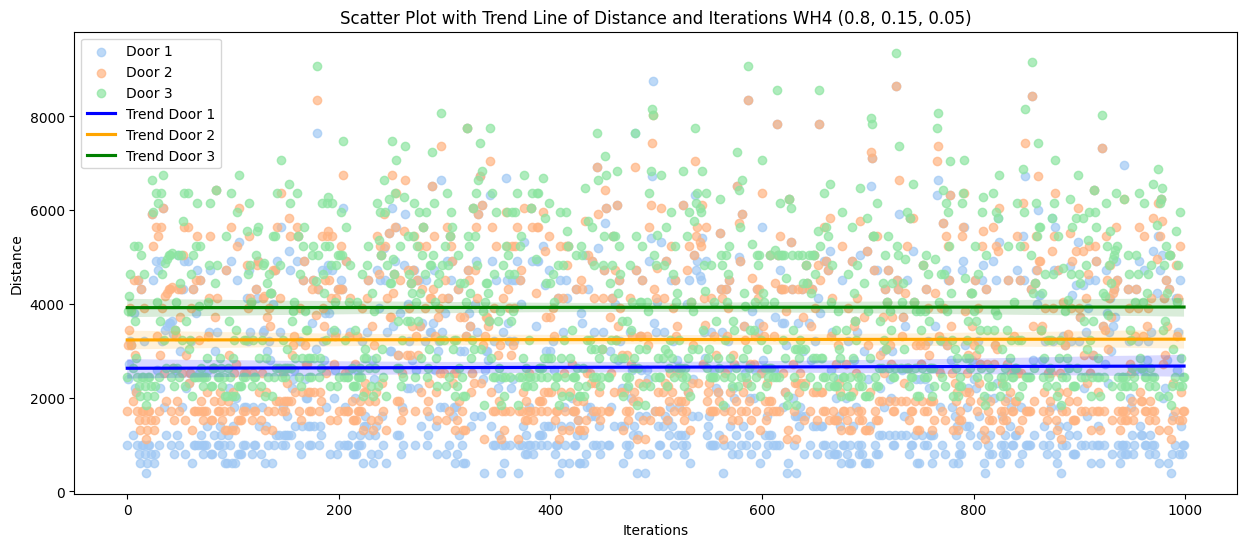

In [ ]:
# ตั้งค่าสีโดยใช้ pastel palette
sns.set_palette("pastel")

# สร้างภาพด้วย figsize
plt.figure(figsize=(15, 6))

# พล็อต scatter plot
plt.scatter(range(len(z1)), z1, label='Door 1', alpha=0.7)
plt.scatter(range(len(z2)), z2, label='Door 2', alpha=0.7)
plt.scatter(range(len(z3)), z3, label='Door 3', alpha=0.7)

# เพิ่ม trend line
sns.regplot(x=list(range(len(z1))), y=z1, scatter=False, label='Trend Door 1', color='blue')
sns.regplot(x=list(range(len(z2))), y=z2, scatter=False, label='Trend Door 2', color='orange')
sns.regplot(x=list(range(len(z3))), y=z3, scatter=False, label='Trend Door 3', color='green')

# ปรับแต่งรายละเอียด
plt.title('Scatter Plot with Trend Line of Distance and Iterations WH4 ' f'({prob_a}, {prob_b}, {prob_c})')
plt.xlabel('Iterations')
plt.ylabel('Distance')
plt.legend()

#s1_wh4 = os.path.join('/content/drive/MyDrive/is/result_pic/plot/', f'{n_r}_graph_wh4_plot.png')
#s2_wh4 = os.path.join('/content/result_pic/plot/', f'{n_r}_graph_wh4_plot.png')
##plt.savefig(s1_wh4)
#plt.savefig(s2_wh4)

# แสดงกราฟ
#plt.show()

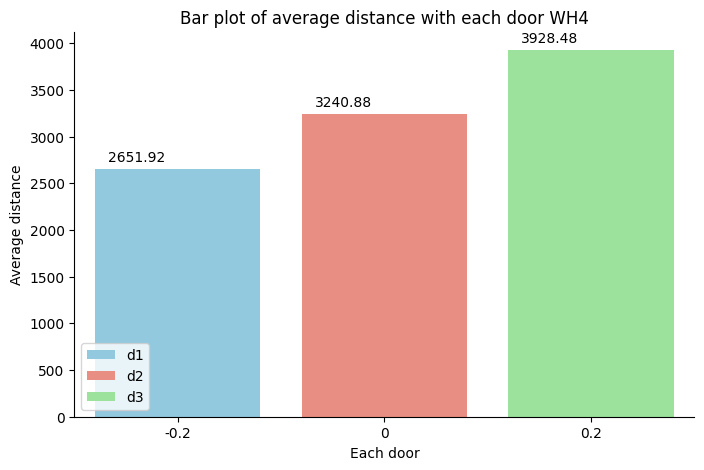

In [ ]:
# พล็อตกราฟแท่งที่ซ้อนกันด้วย Seaborn
bar_width = 0.2
index = np.arange(1)

sns.set_palette("pastel")  # กำหนดสีให้กับแผนภูมิ

plt.figure(figsize=(8, 5))  # กำหนดขนาดของกราฟ
ax = sns.barplot(x=index - bar_width, y=[avg_dis_st_wh4_d1], color="skyblue", label='d1')
sns.barplot(x=index, y=[avg_dis_st_wh4_d2], color="salmon", label='d2')
sns.barplot(x=index + bar_width, y=[avg_dis_st_wh4_d3], color="lightgreen", label='d3')

# เพิ่มตัวเลข z ลงบนแผนภูมิ
for i, value in enumerate([avg_dis_st_wh4_d1, avg_dis_st_wh4_d2, avg_dis_st_wh4_d3]):
    ax.text(i - bar_width, value + 50, f"{value:.2f}", ha='center', va='bottom', color='black', fontsize=10)

# ปรับแต่งรายละเอียด
plt.title('Bar plot of average distance with each door WH4')
plt.xlabel('Each door')
plt.ylabel('Average distance')

# ปิดเส้นพื้นหลังด้านบนและด้านข้าง
sns.despine(top=True, right=True, left=False, bottom=False)

# ปรับตำแหน่งของ legend มาที่มุมล่างซ้าย
plt.legend(loc='lower left', bbox_to_anchor=(0, 0))

#s3_wh4 = os.path.join('/content/drive/MyDrive/is/result_pic/avg/', f'{n_r}_graph_wh4_avg.png')
#s4_wh4 = os.path.join('/content/result_pic/avg/', f'{n_r}_graph_wh4_avg.png')
#plt.savefig(s3_wh4)
#plt.savefig(s4_wh4)

#plt.show()

# **Result file to view**

In [ ]:
result_data = []  # สร้างรายการเพื่อเก็บข้อมูล

for i in range(1, 5):
    # ระบุที่อยู่ของไฟล์ .txt
    file_path_check = os.path.join('/content/drive/MyDrive/is/result_avg_dis/each_dis/', f'{n_r}_result_avg_dis_wh{i}.txt')

    # เปิดไฟล์เพื่ออ่าน
    with open(file_path_check, 'r') as file:
        lines = file.readlines()

    # นำข้อมูลจากทุกบรรทัด 0 ถึง 11 ของไฟล์
    result_data.extend([line.strip() for line in lines[:12]])

# นำข้อมูลมาต่อกันเป็นข้อความ
result_text = '\n'.join(result_data)

file_path_local = os.path.join('/content/drive/MyDrive/is/result_avg_dis/', f'{n_r}_result_combined.txt')
with open(file_path_local, 'w') as file:
    file.write(result_text)

In [ ]:
# ทำการคัดลอกไฟล์จาก Google Drive ไปยังโฟลเดอร์ที่ Colab สามารถเข้าถึงได้
file_path_drive_0x = os.path.join('/content/drive/MyDrive/is/result_avg_dis/', f'{n_r}_result_combined.txt')
file_path_drivex = file_path_drive_0x
file_path_local_0z = os.path.join('/content/result_avg_dis/'f'{n_r}_result_combined.txt')
file_path_colabz = file_path_local_0z

file_path_colab_read = shutil.copyfile(file_path_drivex, file_path_colabz)

# ทดสอบการอ่านข้อมูลจากไฟล์ที่อยู่ใน Colab
with open(file_path_colab_read, 'r') as file:
    data = file.read()
    #print(data)